# Выделение групп пользователей приложения "Ненужные вещи" на основе их поведения

[**Ссылка на презентацию**](https://drive.google.com/file/d/1livn_JD4vjgr2TlJ7AtcCKmoMPTNoZhu/view?usp=share_link)   
[**Ссылка на дашборд**](https://public.tableau.com/app/profile/yana.sergeeva/viz/_16860564415370/Dashboard2?publish=yes)

## Описание проекта

Датасет содержит данные о событиях, совершенных в мобильном приложении "Ненужные вещи". В нем пользователи продают свои ненужные вещи, размещая их на доске объявлений.

В датасете содержатся данные пользователей, впервые совершивших действия в приложении после 7 октября 2019 года.

Датасет **mobile_dataset.csv** содержит колонки:

`event.time` — время совершения

`event.name` — название события

`user.id` — идентификатор пользователя

Датасет **mobile_sources.csv** содержит колонки:

`userId` — идентификатор пользователя

`source` — источник, с которого пользователь установил приложение

**Расшифровки событий:**

`advert_open` — открытие карточки объявления

`photos_show` — просмотр фотографий в объявлении

`tips_show` — пользователь увидел рекомендованные объявления

`tips_click` — пользователь кликнул по рекомендованному объявлению

`contacts_show` и `show_contacts` — пользователь нажал на кнопку "посмотреть номер телефона" на карточке объявления

`contacts_call` — пользователь позвонил по номеру телефона на карточке объявления

`map` — пользователь открыл карту размещенных объявлений

`search_1` — `search_7` — разные события, связанные с поиском по сайту

`favorites_add` — добавление объявления в избранное

## Выделение задачи

**Цель проекта:**

Продакт-менеджер дал задачу, чтобы как можно больше товаров продавалось в приложении, следовательно увеличивалась монетизация бизнеса. Необходимо выделить группы пользователей, и понять под каких пользователей нужно развивать работу приложения.

Чтобы разделить пользователей на группы и ответить на вопросы заказчика, нужно исследовать общее поведение пользователей.

**Задачи:**

1) Необходимо выделить группы пользователей на основе полученных данных для управления вовлеченностью (адаптировать приложение под целевую и смежные аудитории)

2) Получить на основе сегментации гипотезы о том, как можно было бы улучшить приложение с точки зрения пользовательского опыта

3) Дать рекомендации по дальнейшему развитию приложения.

## Импорт необходимых библиотек и загрузка данных

In [1]:
import pandas as pd
import datetime as dt
from datetime import timedelta
import numpy as np
import calendar
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import plotly.express as px
from plotly import graph_objects as go
from plotly.offline import plot
from scipy import stats as st
import math as mth

In [2]:
# Загружаю датасеты
mobile_dataset, mobile_sources= (pd.read_csv('https://code.s3.yandex.net/datasets/mobile_dataset.csv'),
                                 pd.read_csv('https://code.s3.yandex.net/datasets/mobile_sources.csv'))

In [3]:
# Посмотрю на первые 5 строк обеих таблиц
print()
print('Первые 5 строк таблицы mobile_dataset:')
display(mobile_dataset.head())
print('-'*100)
print()
print('Первые 5 строк таблицы mobile_sources:')
display(mobile_sources.head())


Первые 5 строк таблицы mobile_dataset:


,event.time,event.name,user.id
0,2019-10-07 00:00:00.431357,advert_open,020292ab-89bc-4156-9acf-68bc2783f894
1,2019-10-07 00:00:01.236320,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
2,2019-10-07 00:00:02.245341,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c
3,2019-10-07 00:00:07.039334,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
4,2019-10-07 00:00:56.319813,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c


----------------------------------------------------------------------------------------------------

Первые 5 строк таблицы mobile_sources:


,userId,source
0,020292ab-89bc-4156-9acf-68bc2783f894,other
1,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex
2,8c356c42-3ba9-4cb6-80b8-3f868d0192c3,yandex
3,d9b06b47-0f36-419b-bbb0-3533e582a6cb,other
4,f32e1e2a-3027-4693-b793-b7b3ff274439,google



## Предобработка данных

### Проверка заголовков датафрейма, типов данных и пропусков

In [4]:
# Посмотрю на общую информацию по каждому датафрейму
print()
print('Общая информация по таблице mobile_dataset:')
print()
display(mobile_dataset.info())
print('-'*100)
print()
print('Общая информация по таблице mobile_sources:')
print()
display(mobile_sources.info())


Общая информация по таблице mobile_dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74197 entries, 0 to 74196
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   event.time  74197 non-null  object
 1   event.name  74197 non-null  object
 2   user.id     74197 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


None

----------------------------------------------------------------------------------------------------

Общая информация по таблице mobile_sources:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4293 entries, 0 to 4292
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   userId  4293 non-null   object
 1   source  4293 non-null   object
dtypes: object(2)
memory usage: 67.2+ KB


None

**`Получили следующую информацию:`**

**Таблица mobile_dataset:**

- Необходимо привести названия всех столбцов к змеиному регистру
- Необходимо привести тип данных столбца 'event.time' к формату datetime
- Пропусков в таблице нет

**Таблица mobile_sources**:

- Необходимо привести название колонки 'userId' к змеиному регистру
- Типы данных соответствуют значениям в таблице
- Пропусков в таблице нет

In [5]:
# Изменю названия столбцов таблицы mobile_dataset
mobile_dataset = mobile_dataset.rename(columns={'event.time':'event_time',
                                               'event.name':'event_name',
                                               'user.id':'user_id'})
# Измененю названия столбцов таблицы mobile_sources
mobile_sources = mobile_sources.rename(columns={'userId':'user_id'})

# Выведу названия колонок на экран
print()
print('Названия колонок таблицы mobile_dataset:')
display(mobile_dataset.columns)
print('-'*100)
print()
print('Названия колонок таблицы mobile_sources:')
display(mobile_sources.columns)


Названия колонок таблицы mobile_dataset:


Index(['event_time', 'event_name', 'user_id'], dtype='object')

----------------------------------------------------------------------------------------------------

Названия колонок таблицы mobile_sources:


Index(['user_id', 'source'], dtype='object')

**`Названия колонок исправлены`**

In [6]:
# Приведу тип данных столбца 'event_time' к формату datetime с округлением времени до целой секунды
mobile_dataset['event_time'] = pd.to_datetime(mobile_dataset['event_time']).dt.round('1s')

# Проверю типы данных столбцов
print()
print('Типы данных столбцов таблицы mobile_dataset:')
display(mobile_dataset.dtypes)
print('-'*100)
# Проверю, что время округлилось до целой секунды
print()
print('Первые 5 значений столбца event_time:')
display(mobile_dataset['event_time'].head())


Типы данных столбцов таблицы mobile_dataset:


event_time    datetime64[ns]
event_name            object
user_id               object
dtype: object

----------------------------------------------------------------------------------------------------

Первые 5 значений столбца event_time:


0   2019-10-07 00:00:00
1   2019-10-07 00:00:01
2   2019-10-07 00:00:02
3   2019-10-07 00:00:07
4   2019-10-07 00:00:56
Name: event_time, dtype: datetime64[ns]

**`Тип данных столбца 'event_time' приведен к формату datetime. Значения столбца округлены до целой секунды`**

### Объединение датасетов

In [7]:
# Посмотрю, что в обоих датасетах user_id полностью совпадают.

# Посмотрю на количество уникальных user_id в каждом датасете
print()
print('Количество уникальных user_id в таблице mobile_dataset:', mobile_dataset['user_id'].nunique())
print('Количество уникальных user_id в таблице mobile_sources:', mobile_sources['user_id'].nunique())


Количество уникальных user_id в таблице mobile_dataset: 4293
Количество уникальных user_id в таблице mobile_sources: 4293


**`Количество точно совпадает.`** 

In [8]:
# Проверю, что id пользователей идентичны в обоих датасетах:

# Создам переменную id пользователей в таблице mobile_sources
id_ms = mobile_sources['user_id'].unique()

# Сделаю срез таблицы mobile_dataset, в котором id пользователей совпадает с id пользователей в таблице mobile_sources 
# Вынесу его в отдельную переменную
id_md_ms = mobile_dataset.query('user_id in @id_ms')

print()
print('Количество уникальных пользователей приложения одновременно в таблицах mobile_dataset и mobile_sources:', id_md_ms['user_id'].nunique())


Количество уникальных пользователей приложения одновременно в таблицах mobile_dataset и mobile_sources: 4293


**`user_id польностью совпадают в обоих датасетах. Можно объединять таблицы.`**

In [9]:
# Объединю два датафрейма в один
df = mobile_dataset.merge(mobile_sources, how='outer')
df.head()

,event_time,event_name,user_id,source
0,2019-10-07 00:00:00,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,other
1,2019-10-07 00:00:01,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other
2,2019-10-07 00:00:07,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other
3,2019-10-07 00:01:28,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,other
4,2019-10-07 00:01:35,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other


In [10]:
# Посмотрю общую информацию по получившемуся датафрейму, чтобы убедиться, что все в порядке.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74197 entries, 0 to 74196
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   event_time  74197 non-null  datetime64[ns]
 1   event_name  74197 non-null  object        
 2   user_id     74197 non-null  object        
 3   source      74197 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 2.8+ MB


In [11]:
# Зафиксирую количество строк в получившемся объединенном датаафрейме
len_df = len(df)

print()
print('Количество строк в датафрейме:', len_df)


Количество строк в датафрейме: 74197


### Проверка дубликаты

In [12]:
# В дальнейшей обработке мне несколько раз понадобится вывести информацию о дубликатах, поэтому для удобства создам функцию. 
def duplicates_info(df_name):
    print()
    print('Количество явных дубликатов в датафрейме:', df_name.duplicated().sum())
    print('Процент дубликатов в датафрейме:', "{0:.2%}".format(df_name.duplicated().mean()))

In [13]:
# Выведу количество явных дубликатов.
duplicates_info(df)


Количество явных дубликатов в датафрейме: 1118
Процент дубликатов в датафрейме: 1.51%


**`Процент дубликатов всего 1.51%. Это небольшое значение, их удаление не сильно повлияет на дальнейшее исследование. Удаляю их.`**

In [14]:
# Удаление явных дубликатов
df = df.drop_duplicates().reset_index(drop=True)

# Проверю, что все изменения прошли
duplicates_info(df)


Количество явных дубликатов в датафрейме: 0
Процент дубликатов в датафрейме: 0.00%


### Проверка на скрытые дубликаты

In [15]:
# Найду уникальные значения столбца event_name
unique_event_name = df['event_name'].sort_values().unique()
# Для удобства выведу их в столбик при помощи цикла
for i in unique_event_name:
    print(i)

advert_open
contacts_call
contacts_show
favorites_add
map
photos_show
search_1
search_2
search_3
search_4
search_5
search_6
search_7
show_contacts
tips_click
tips_show


- **`По условию задачи события contacts_show и show_contacts означают одно и то же действие пользователя. Приведем их к одному значению: все значения show_contacts заменим на contacts_show`**

- **`У нас нет расшифровки каждого события search_1 - search_7, но они обозначают действия, связанные с поиском. Поэтому назовем все эти события просто search`**

In [16]:
# Менняю названия в ячейках: show_contacts на contacts_show, search_1 - search_7 на search
df = df.replace({'event_name':{'show_contacts':'contacts_show', 
                              'search_1':'search',
                              'search_2':'search',
                              'search_3':'search',
                              'search_4':'search',
                              'search_5':'search',
                              'search_6':'search',
                              'search_7':'search'}
                }
               )

In [17]:
# Проверю, что изменения прошли
# Найду уникальные значения столбца event_name
unique_event_name = df['event_name'].sort_values().unique()
# Для удобства выведу их в столбик при помощи цикла
for i in unique_event_name:
    print(i)

advert_open
contacts_call
contacts_show
favorites_add
map
photos_show
search
tips_click
tips_show


In [18]:
# После проведенных изменений еще раз проверю датафрейм на явные дубликаты
duplicates_info(df)


Количество явных дубликатов в датафрейме: 72
Процент дубликатов в датафрейме: 0.10%


**`Опять появились дубликаты, но всего 0.1%. Удаляю их.`**

In [19]:
# Удаление явных дубликатов
df = df.drop_duplicates().reset_index(drop=True)

# Проверю, что все изменения прошли
duplicates_info(df)


Количество явных дубликатов в датафрейме: 0
Процент дубликатов в датафрейме: 0.00%


### Создание необходимых столбцов для анализа

In [20]:
# Посчитаю время между сессиями у каждого пользователя в часах
event_dur = df.groupby('user_id')['event_time'].diff()/np.timedelta64(1,'h')
# Исключу время между сессиями больше 24
event_dur = event_dur[event_dur <= 24]
# Посмотрю на среднее время между сессиями в день
print(f'Среднее время между событиями в день составляет {event_dur.mean().round(2)} часов')

Среднее время между событиями в день составляет 0.47 часов


**`Среднее время между событиями в день около 30 минут. Поэтому принимаю решение сделать интервал в 30 минут тем самым интервалом между сессиями, который будет отделять одну сессию пользователя от другой.`**

In [21]:
# Создам столбцы, необходимые для дальнейшего анализа:

# Столбец с датой из столбца event_time
df['date'] = pd.to_datetime(df['event_time'].dt.strftime('%Y-%m-%d'))
# Столбец с указанием днем недели
df['day_of_week'] = df['date'].dt.day_name()
# Столбец с указанием днем недели
df['week_day_num'] = df['date'].dt.weekday

# Столбец с уникальным id каждой сессии:
# Определю разницу в 30 минут между событиями для каждой сессии
g = (df.groupby('user_id')['event_time'].diff() > pd.Timedelta('30Min')).cumsum()
# Создам счетчик групп
df['session_id'] = df.groupby(['user_id', g], sort=False).ngroup() + 1

# Столбец с длительностью каждой сессии
df['session_duration'] = df.groupby('session_id')['event_time'].transform(lambda x: x.max() - x.min())

# Создам столбец с количеством часов, которое провел каждый пользователь в приложении:
# Посчитаю общее время, которое каждый пользователь провел в приложении
df['total_duration'] = df.groupby('user_id')['session_duration'].transform(lambda x: x.unique().sum())
# Представлю значения в количестве часов
df['total_duration'] = df['total_duration']/np.timedelta64(1,'h')
# Округлю значения до целого числа
df['total_duration'] = df['total_duration'].round()

# Столбец с общим количеством дней, когда пользователь пользовался приложением за весь период.
df['total_days_on_user'] = df.groupby('user_id')['date'].transform('nunique')


# Выведу на экран произвольные 10 строк получившейся таблицы
df.sample(10)

,event_time,event_name,user_id,source,date,day_of_week,week_day_num,session_id,session_duration,total_duration,total_days_on_user
56250,2019-10-25 16:35:33,search,d7dae6ce-c085-44b1-bbc5-5eb3b8643199,yandex,2019-10-25,Friday,4,8113,0 days 00:05:47,1.0,2
44794,2019-10-21 09:55:01,photos_show,3a400cd8-80ae-4dad-9b1e-37680c5d0132,other,2019-10-21,Monday,0,6432,0 days 00:04:47,0.0,1
72518,2019-11-03 16:32:24,search,3de04fb0-18d9-4c83-9103-c91e99010a9b,yandex,2019-11-03,Sunday,6,10300,0 days 00:00:48,0.0,1
45540,2019-10-23 16:00:29,photos_show,680a667f-8cee-4b1d-9272-aa01d633dca9,other,2019-10-23,Wednesday,2,6557,0 days 00:02:39,0.0,3
54986,2019-10-25 08:52:35,tips_show,51ec5fac-6e59-4d22-81df-3b5ed0f61cb5,yandex,2019-10-25,Friday,4,7907,0 days 00:28:39,1.0,1
44594,2019-10-21 23:26:32,search,c9c31c08-5b88-43cf-aa2a-45aefb7ecbcf,other,2019-10-21,Monday,0,6402,0 days 00:29:05,1.0,1
16227,2019-10-25 18:24:30,photos_show,97d1107f-1d9c-4086-b2d9-83985afecca3,other,2019-10-25,Friday,4,2325,0 days 00:32:00,3.0,6
19820,2019-10-12 16:10:51,search,19545a92-ec18-48f0-bbdf-5025d8f30bcd,google,2019-10-12,Saturday,5,2842,0 days 00:14:52,0.0,1
17108,2019-10-11 16:14:46,advert_open,cfd9b735-0bc2-448d-8d54-0019db8748a3,yandex,2019-10-11,Friday,4,2450,0 days 00:13:40,4.0,6
7556,2019-10-10 11:51:38,tips_show,7e2ecb55-baac-4174-b6b9-dba3f74f6ebf,google,2019-10-10,Thursday,3,938,0 days 00:24:07,2.0,3


In [22]:
# Проверю, что количество дней использования приложения не превышает количество дней в датасете
# Еще раз выведу количество дней в датасете
print()
print('Количество дней датасета составляет:', (df['date'].max() - df['date'].min()))
print('Максимальное количество дней использования приложения:', df['total_days_on_user'].max())


Количество дней датасета составляет: 27 days 00:00:00
Максимальное количество дней использования приложения: 25


In [23]:
# Выведу на экран количество строк, которое осталось после обработки данных
print()
print(f'После обработки данных в датафрейме осталось {len(df)} строк')
print(f'Было удалено {len_df - len(df)} строк, что составляет', "{0:.2%}".format((len_df - len(df))/len_df))


После обработки данных в датафрейме осталось 73007 строк
Было удалено 1190 строк, что составляет 1.60%


### Вывод по проведенной предобработке данных

**Во время предобработки данных сделано следующее:**

- **Исправлены названия колонок**
- **Тип данных столбца 'event_time' привели к формату datetime. Значения столбца округлили до целой секунды.**
- **Выяснили, что user_id польностью совпадают в обоих датасетах.**
- **Объединили два датасета в один. После объединнения таблиц количество строк в датафрейме составило 74197**
- **По условию задачи события contacts_show и show_contacts означают одно и то же действие пользователя. Привели их к одному значению: все значения show_contacts заменили на contacts_show**
- **У нас нет расшифровки каждого события search_1 - search_7, но они в условиях задачи сказано, что все они обозначают действия, связанные с поиском. Поэтому назвали все эти события просто search**
- **Выявили и удалили явные и скрытые дубликаты**
- **Добавили столбцы, которые будут необходимы для дальнейшего анализа**
- **В процессе предобработки данных было удалено 1190 строк, что составляет 1.60%**
- **Количество строк, которое осталось в датафрейме для дальнейшего исследования составляет 73007 строк**

## Исследовательский анализ данных

In [24]:
# Выведу на эран информацию данные о периоде в датафрейме
print()
print(f'Датафрейм содержит данные с {df["date"].min().date()} по {df["date"].max().date()}')
print(f'Это составляет {df["date"].max() - df["date"].min()} дней')


Датафрейм содержит данные с 2019-10-07 по 2019-11-03
Это составляет 27 days 00:00:00 дней


### Изучение нулевых сессий

In [25]:
# Посмотрю много ли нулевых сессий
session_duration_0 = df.query('session_duration == "0 days 00:00:00"')
print()
print('Количество сессий с длительностью 0 секунд:', len(session_duration_0))


Количество сессий с длительностью 0 секунд: 2143


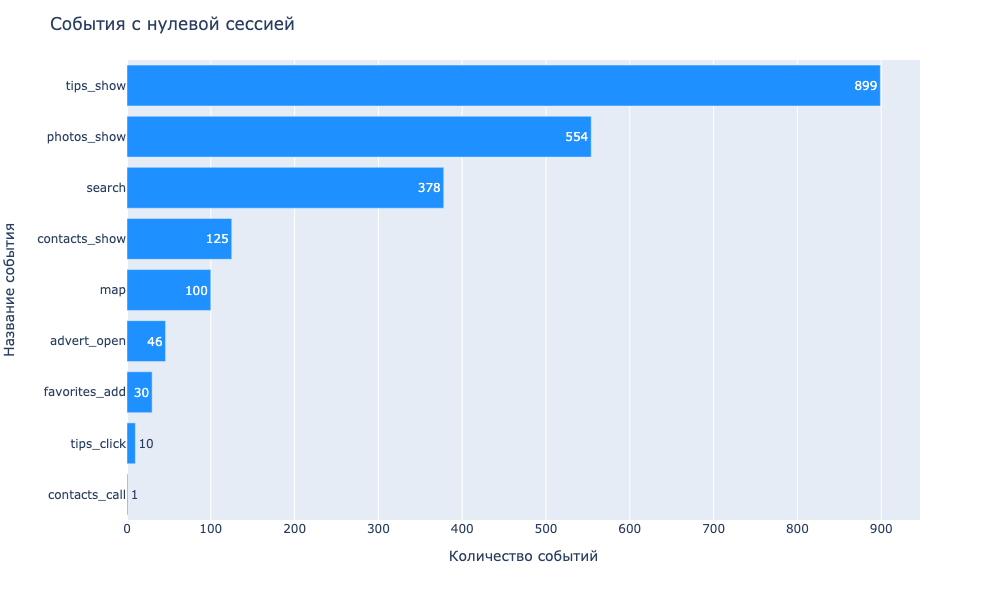

In [26]:
# Посмотрю какие события чаще всего заканчиваются нулевой сессией
event_session_duration_0 = (session_duration_0['event_name']
                            .value_counts()
                            .to_frame()
                            .reset_index()
                            .rename(columns={'index':'event_name',
                                             'event_name':'cnt'})
                           )
event_session_duration_0

# Строю столбчатую диаграмму 
fig = px.bar(event_session_duration_0.sort_values(by='cnt', ascending=True), # загружаем данные и заново их сортируем
             x='cnt', 
             y='event_name',
             text='cnt'
            )    
fig.update_traces(marker_color = 'dodgerblue')

# Оформляю график
fig.update_layout(title='События с нулевой сессией',
                   xaxis_title='Количество событий',
                   yaxis_title='Название события')

fig.show(renderer="png", width=1000, height=600)

**`Однозначно нельзя сказать, что какое-то конкретно событие заканчивается нулевой сессией. Но тройка лидеров - это события tips_show (пользователь увидел рекомендованные объявления), photos_show (просмотр фотографий в объявлении) и search (поиск). Меньше всего нулевой длительностью заканчивается событие contacts_call (пользователь позвонил по номеру телефона на карточке объявления)`**

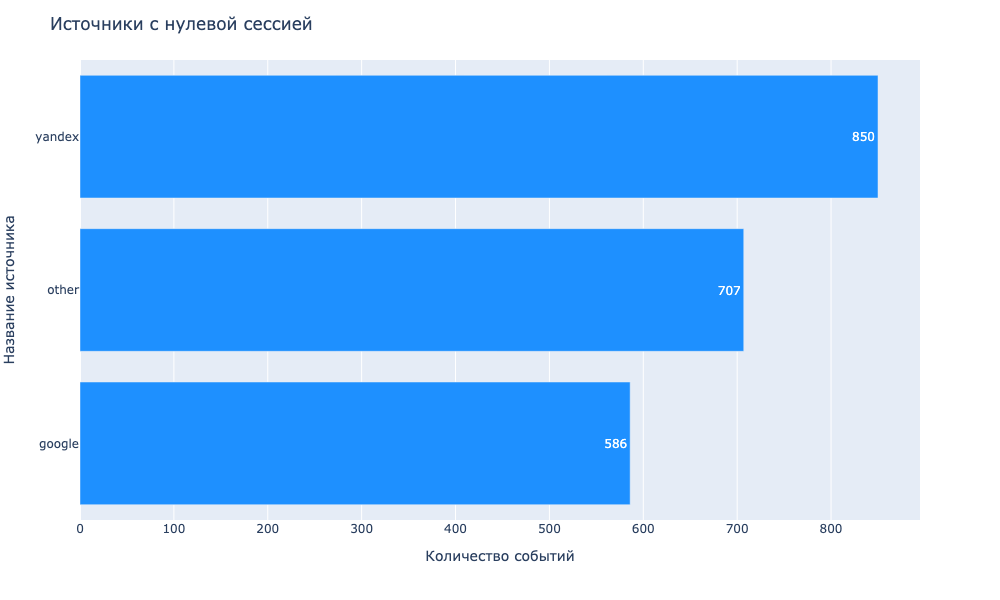

In [27]:
# Проверю из каких источников чаще возникают нулевые сессии
source_session_duration_0 = (session_duration_0['source']
                             .value_counts()
                             .to_frame()
                             .reset_index()
                             .rename(columns={'index':'source',
                                             'source':'cnt'})
                           )

# Строю столбчатую диаграмму 
fig = px.bar(source_session_duration_0.sort_values(by='cnt', ascending=True), # загружаем данные и заново их сортируем
             x='cnt', 
             y='source',
             text='cnt'
            )    
fig.update_traces(marker_color = 'dodgerblue')

# Оформляю график
fig.update_layout(title='Источники с нулевой сессией',
                   xaxis_title='Количество событий',
                   yaxis_title='Название источника')

fig.show(renderer="png", width=1000, height=600)

**`Нулевой сессией может закончиться переход из всех источников. Тут нет конкретного антилидера.`**

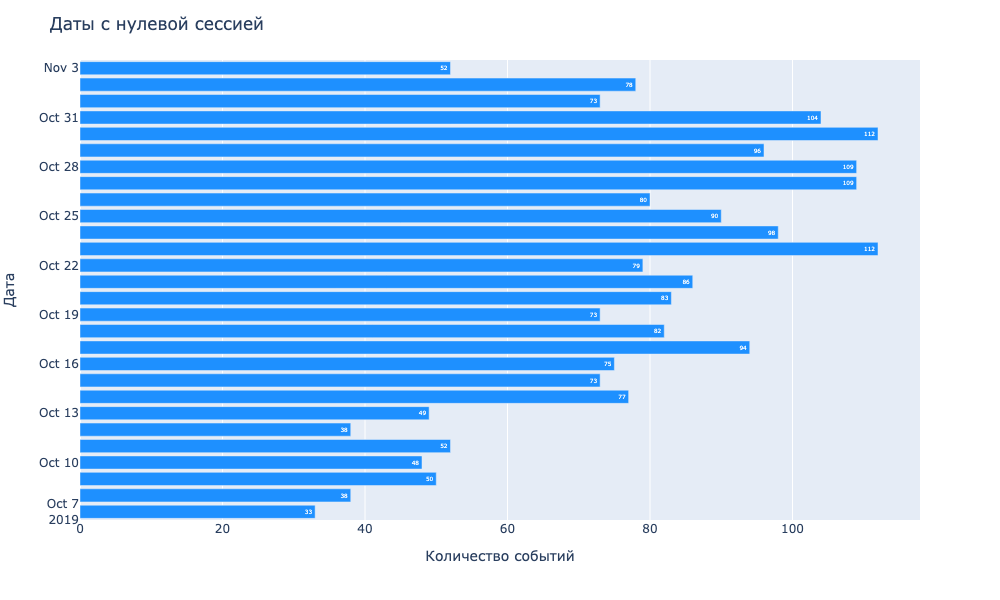

In [28]:
# Проверю в какие даты происходили такие события
date_session_duration_0 = (session_duration_0['date']
                           .value_counts()
                           .to_frame()
                           .reset_index()
                           .rename(columns={'index':'date',
                                             'date':'cnt'})
                           )

# Строю столбчатую диаграмму 
fig = px.bar(date_session_duration_0.sort_values(by='date', ascending=True), # загружаем данные и заново их сортируем
             x='cnt', 
             y='date',
             text='cnt'
            )    
fig.update_traces(marker_color = 'dodgerblue')

# Оформляю график
fig.update_layout(title='Даты с нулевой сессией',
                   xaxis_title='Количество событий',
                   yaxis_title='Дата')

fig.show(renderer="png", width=1000, height=600)

**`Во все дни были события с нулевой длительностью сессии. Но в начале исследуемого периода их было меньше.`**

**`Однозначно нельзя сказать, что какое-то конкретно событие, переход из конкретного источника или событие в конкретную дату, заканчивается нулевой сессией. Предположу, что пользователи по личным причинам просто завершили сессию, не начав ее.`**

In [29]:
# Эти сесии теперь не представляют для меня никаой информации, поэтому удалю их из датафрейма
df = df.query('session_duration != "0 days 00:00:00"')

### Создание необходимых функций для анализа

#### Функция для создания профилей пользователей

In [30]:
# Создадим профили пользователей

# Напишу функцию, которая будет возвращать профили пользователей
def get_profiles(session):
    
    '''
    Функция, которая возвращает профили пользователей
    
    session - таблица, которая содержит пользовательские сессии
    
    '''
    # Сортируем сессии по id пользователя и дате посещения
    profiles = (
        # Сортируем сессии по id пользователя и дате посещения
        session.sort_values(by=['user_id', 'date'])
        # Группируем по id
        .groupby('user_id')
        # Находим первые значения week_day,  event_name и source
        .agg({'event_time':'first',
              'date':'first',
              'event_name':'first',
              'source':'first'})
        # Столбец с неделей первого посещения назовем first_week_cohort, с первым событием first_event, с первым источником first_sours
        .rename(columns={'event_time':'first_ts',
                         'event_name':'first_event',
                         'date':'first_date'
                        }
               )
        # Возвращаем id из индекса
        .reset_index()
    )   
 
    return profiles
        

#### Функция для расчета Retention Rate

In [31]:
# Функция для расчета Retention Rate по дням
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],  
    ignore_horizon=False,
):

    # Рассчитываем максимально возможную дату привлечения
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
        days=horizon_days - 1)
        
    # Исключаем пользователей пришедших после максимальной даты
    result_raw = profiles.query('first_date <= @last_suitable_acquisition_date')

    # Рассчитываем коэффициент удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'event_time']], on='user_id', how='left'
    )
    # Вычисляем лайфтайм каждой сессии в днях
    result_raw['lifetime'] = (
        result_raw['event_time'] - result_raw['first_ts']
    ).dt.days

    # Строим таблицу удержания
    result_grouped = result_raw.pivot_table(
        index=dimensions, 
        columns='lifetime',
        values='user_id',
        aggfunc='nunique',
    )
    # вычисляем размеры когорт
    cohort_sizes = (
        result_raw.groupby(dimensions) 
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'cohort_size'})
    )
    # объединяем размеры когорт и таблицу удержания
    result_grouped = cohort_sizes.merge(
        result_grouped, on=dimensions, how='left'
    ).fillna(0)
    result_grouped = result_grouped.div(result_grouped['cohort_size'], axis=0)
    
    # исключаем все лайфтаймы, превышающие горизонт анализа
    result_grouped = result_grouped[
        ['cohort_size'] + (list(range(horizon_days)))
    ]

    # восстанавливаем столбец с размерами когорт
    result_grouped['cohort_size'] = cohort_sizes
    

    # возвращаем таблицу удержания и сырые данные
    return result_raw, result_grouped

#### Функция для расчета конверсии в целевое действие

In [32]:
def get_conversion(
    profiles,
    contacts_how,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('first_date <= @last_suitable_acquisition_date')

    # определяем дату и время первого совершения целевого действия каждым пользователем
    first_contacts_how = (
        contacts_how.sort_values(by=['user_id', 'event_time'])
        .groupby('user_id')
        .agg({'event_time': 'first'})
        .reset_index()
    )

    # добавляем данные о совершении целевого действия в профили
    result_raw = result_raw.merge(
        first_contacts_how[['user_id', 'event_time']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждого целевого действия
    result_raw['lifetime'] = (
        result_raw['event_time'] - result_raw['first_ts']
    ).dt.days
    

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']


    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу конверсии
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        # считаем сумму с накоплением для каждой строки
        result = result.fillna(0).cumsum(axis = 1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # добавляем размеры когорт в таблицу конверсии
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)
    
    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []


    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['event_time'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

### Расчет Retention Rate

In [33]:
# Создам профили пользователей
profiles = get_profiles(df)
profiles

,user_id,first_ts,first_date,first_event,source
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07 13:39:46,2019-10-07,tips_show,other
1,00157779-810c-4498-9e05-a1e9e3cedf93,2019-10-19 21:34:34,2019-10-19,search,yandex
2,00463033-5717-4bf1-91b4-09183923b9df,2019-11-01 13:54:35,2019-11-01,photos_show,yandex
3,004690c3-5a84-4bb7-a8af-e0c8f8fca64e,2019-10-18 22:14:06,2019-10-18,search,google
4,00551e79-152e-4441-9cf7-565d7eb04090,2019-10-25 16:44:41,2019-10-25,contacts_show,yandex
...,...,...,...,...,...
4201,ffab8d8a-30bb-424a-a3ab-0b63ebbf7b07,2019-10-13 16:11:27,2019-10-13,map,yandex
4202,ffc01466-fdb1-4460-ae94-e800f52eb136,2019-10-07 20:32:50,2019-10-07,photos_show,yandex
4203,ffcf50d9-293c-4254-8243-4890b030b238,2019-10-23 11:51:35,2019-10-23,tips_show,google
4204,ffe68f10-e48e-470e-be9b-eeb93128ff1a,2019-10-21 16:39:34,2019-10-21,search,yandex


**`По выведенным результатам можно заметить, что не все первые действия пользователей в приложении одинаковы. Могу предположить, что некоторые пользователи, скачав приложение, сразу не открывали его. А открыли позже, перейдя по какой-либо рекомендованной ссылке.`**

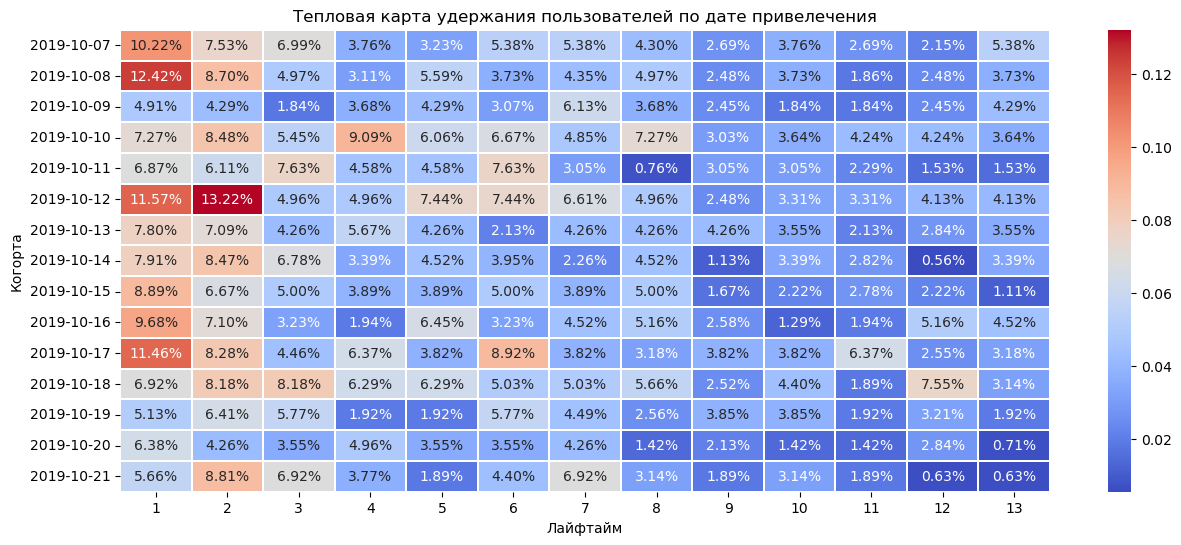

In [34]:
# Рассчитаем Retention Rate с горизонтом анализа 14 дней
observation_date = df['date'].max()
analisis_horizon = 14

retention_raw, retention = get_retention(
    profiles,
    df,
    observation_date,
    analisis_horizon,
    dimensions=['first_date']
)

retention.index = retention.index.strftime('%Y-%m-%d')
# Построим хитмэп
plt.figure(figsize=(15, 6))
sns.heatmap(retention.drop(columns=['cohort_size', 0]),  # удаляем размеры когорт и нулевой лайфтайм
            annot=True,# включаем подписи
            fmt='.2%',
            cmap='coolwarm',
            linewidths=0.01,
)


plt.title('Тепловая карта удержания пользователей по дате привелечения')
plt.xlabel('Лайфтайм')
plt.ylabel('Когорта')
plt.show()

In [35]:
retention_raw.head()

,user_id,first_ts,first_date,first_event,source,event_time,lifetime
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07 13:39:46,2019-10-07,tips_show,other,2019-10-07 13:39:46,0
1,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07 13:39:46,2019-10-07,tips_show,other,2019-10-07 13:40:31,0
2,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07 13:39:46,2019-10-07,tips_show,other,2019-10-07 13:41:06,0
3,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07 13:39:46,2019-10-07,tips_show,other,2019-10-07 13:43:21,0
4,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07 13:39:46,2019-10-07,tips_show,other,2019-10-07 13:45:31,0


**`Самый большой показатель Retention Rate на 2 день жизни у пользователей, которые пришли в приложение 8, 12 и 17 октября.
На 7 день самое высокое удердание показывают пользователи, пришедшие 9 и 12 октября.
На 14 день самый высокий пройент удержание у пользователей, пришедших 7, 9 и 16 октября.
По тепловой карте видно, что удержание пользователей падает не на всем периоде "жизни" пользователя в приложении. Есть дни, когда Retention Rate увеличивается. Прошло еще мало времени, чтобы утверждать как сильно падает метрика Retention Rate
И нельзя однозначно утверждать, что удержание падает, ведь пользователи могут не ежедневно искать объявления.`**

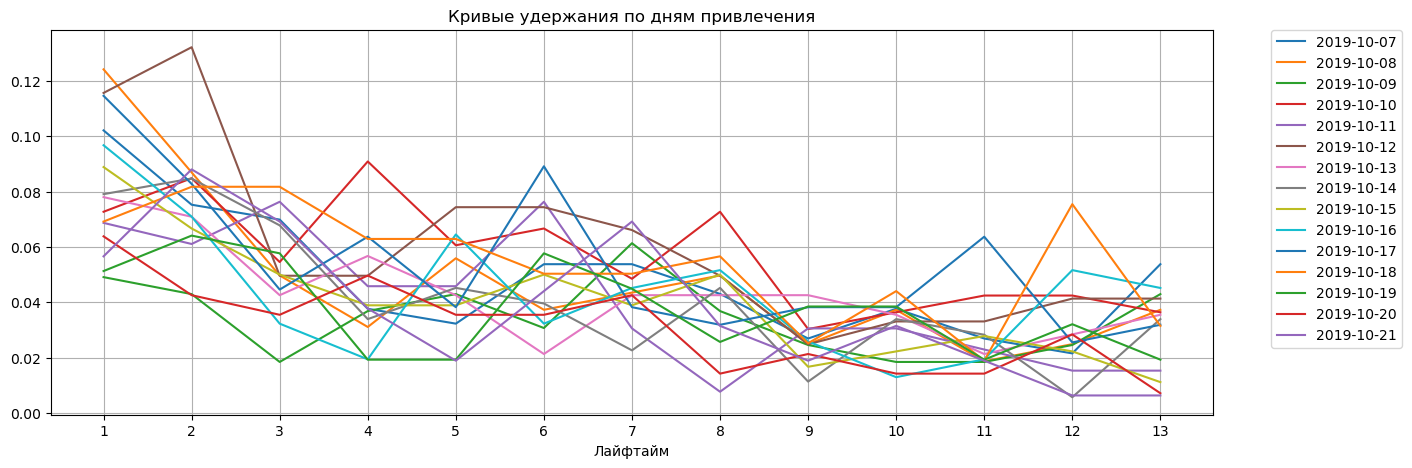

In [36]:
# Построю кривые удержания
report = retention.drop(columns = ['cohort_size', 0])
report.T.plot(
    grid=True,  # добавляем сетку
    xticks=list(report.columns.values),  # отметки на оси X — названия колонок
    figsize=(15, 5),  # размер графика
)
plt.xlabel('Лайфтайм')  # название оси X
plt.title('Кривые удержания по дням привлечения')  # название графика
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left', borderaxespad=0)
plt.show()

**`По графику динамики удержания так же видно, что этот показатель постепенно снижается, но не на всем периоде.`**

### Расчет времени, проведенное в приложении

In [37]:
# Посмотю значения столбца total_duration
df['total_duration'].unique()

array([ 0.,  3.,  2.,  1.,  7., 28.,  4., 19.,  9.,  5.,  8., 15.,  6.,
       17., 10., 13., 16.])

In [38]:
# Посчитаю количество этих значений
cnt_hours_duration = (df
                      .pivot_table(index='user_id',
                                   values='total_duration',
                                   aggfunc='mean')
                      .rename(columns={'total_duration':'hours'})
                      .reset_index()
                     )
cnt_hours_duration = (cnt_hours_duration['hours']
                      .value_counts()
                      .to_frame()
                      .reset_index()
                      .rename(columns={'index':'cnt_hours',
                                      'hours':'cnt_users'})
                     )
cnt_hours_duration


,cnt_hours,cnt_users
0,0.0,2997
1,1.0,925
2,2.0,160
3,3.0,62
4,4.0,25
5,5.0,13
6,6.0,7
7,9.0,5
8,7.0,4
9,19.0,1


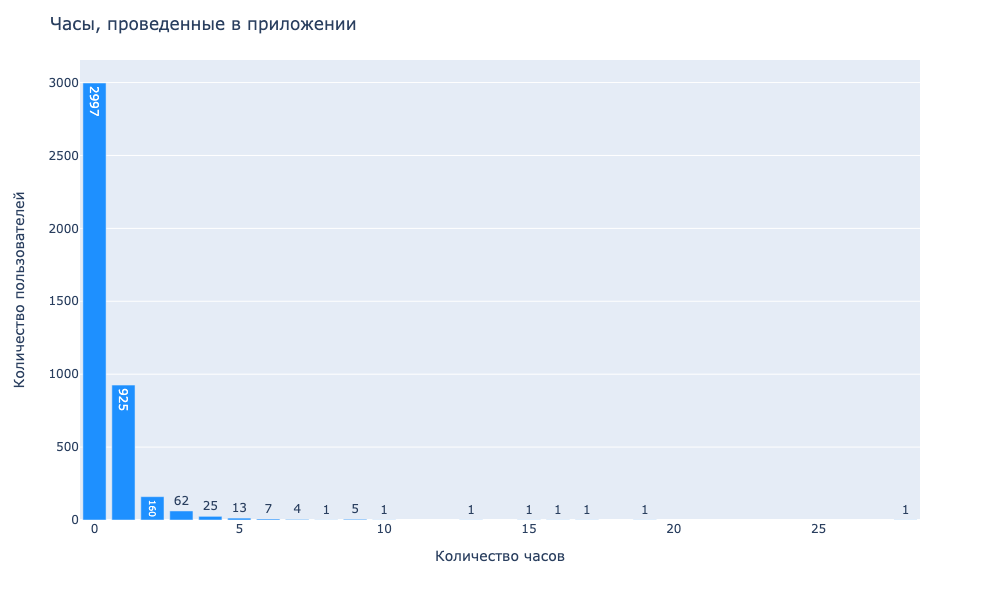

In [39]:
# Построю гистограмму
fig = px.bar(cnt_hours_duration.sort_values(by='cnt_hours', ascending=False),
             x = 'cnt_hours',
             y = 'cnt_users',
             text = 'cnt_users')
fig.update_traces(marker_color = 'dodgerblue')

# Оформлю график
fig.update_layout(title='Часы, проведенные в приложении',
                   xaxis_title='Количество часов',
                   yaxis_title='Количество пользователей')

fig.show(renderer="png", width=1000, height=600) 

**`Подавляющее большинство клиентов провели в приложении меньше 1 часа за весь период предоставленных данных. Но есть и 1 пользователь, который провел в приложении дольше всех - 28 часов`**

In [40]:
# Изучу количество дней, в которые пользователи открывали приложение.
cnt_days_duration = (df
                      .pivot_table(index='user_id',
                                   values='total_days_on_user',
                                   aggfunc='mean')
                      .rename(columns={'total_days_on_user':'days'})
                      .reset_index()
                     )

cnt_days_duration = (cnt_days_duration['days']
                             .value_counts()
                             .to_frame()
                             .reset_index()
                            . rename(columns={'index':'cnt_days',
                                             'days':'cnt_users'})
                    )
cnt_days_duration


,cnt_days,cnt_users
0,1,2688
1,2,777
2,3,343
3,4,156
4,5,85
5,6,44
6,7,39
7,8,20
8,10,11
9,12,10


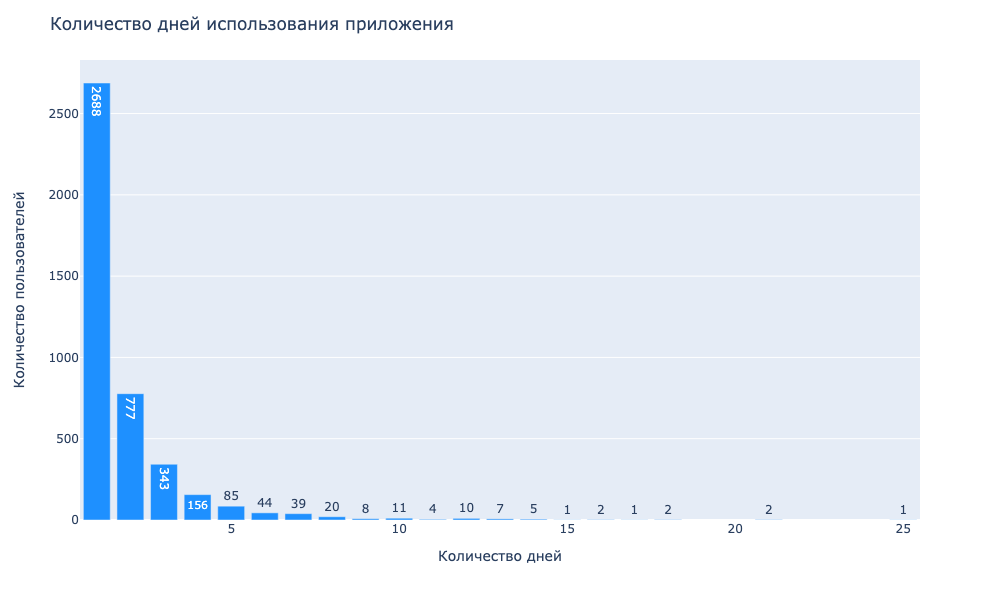

In [41]:
# Построю гистограмму
fig = px.bar(cnt_days_duration.sort_values(by='cnt_days', ascending=False),
             x = 'cnt_days',
             y = 'cnt_users',
             text = 'cnt_users')
fig.update_traces(marker_color = 'dodgerblue')
# оформляем график
fig.update_layout(title='Количество дней использования приложения',
                   xaxis_title='Количество дней',
                   yaxis_title='Количество пользователей')
fig.show(renderer="png", width=1000, height=600) # выводим график

**`Подавляющее количество пользователей открывали приложение лишь в один день из всего периода предоставленных данных.`**

In [42]:
# Выведу на экран средние значения времени проведенного в придожении
print()
print('Среднее количество часов, проведенных в приложении:', cnt_hours_duration['cnt_hours'].median())
print('Среднее количество дней использования приложения:', cnt_days_duration['cnt_days'].median())


Среднее количество часов, проведенных в приложении: 8.0
Среднее количество дней использования приложения: 10.5


### Расчет частоты действий

In [43]:
# Посмотрю сначала на общее количество событий в датафрейме
cnt_event = (df['event_name']
             .value_counts()
             .to_frame()
             .reset_index()
             .rename(columns={'index':'event_name',
                              'event_name':'cnt_events'})
            )
                            
cnt_event

,event_name,cnt_events
0,tips_show,38993
1,photos_show,8818
2,search,6316
3,advert_open,6099
4,contacts_show,4256
5,map,3660
6,favorites_add,1384
7,tips_click,801
8,contacts_call,537


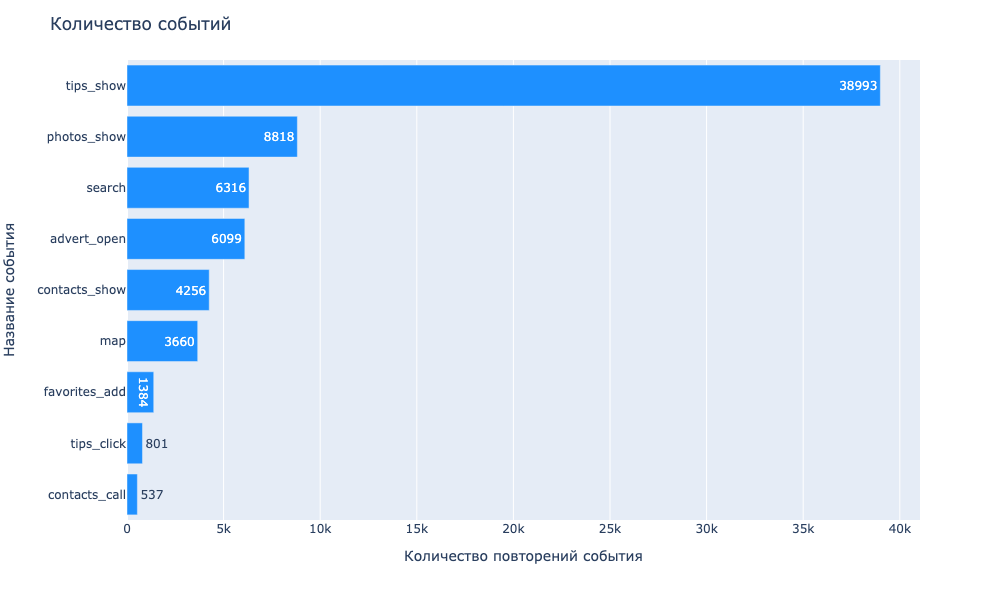

In [44]:
# Построю гистограмму
fig = px.bar(cnt_event.sort_values(by='cnt_events', ascending=True),
             x = 'cnt_events',
             y = 'event_name',
             text = 'cnt_events')
fig.update_traces(marker_color = 'dodgerblue')

# Оформлю график
fig.update_layout(title='Количество событий',
                   xaxis_title='Количество повторений события',
                   yaxis_title='Название события')

fig.show(renderer="png", width=1000, height=600)

**`С огромным преимуществом совершается событие tips_show(пользователь увидел рекомендованные объявления). Скорее всего это событие автоматически совершается, как только пользователь открыл приложение. Однако событие tips_click(пользователь кликнул по рекомендованному объявлению) совершается очень редко.
Видна большая разница между событиями search(поиск) и tips_click(пользователь кликнул по рекомендованному объявлению). Пользователи предпочитают искать то, что им необходимо, через самостоятельно задаваемые критерии.`**

In [45]:
#Посчитаем с какой частотой совершаются события
event_period = df[['event_time', 'event_name']].copy()
event_period.head()

,event_time,event_name
0,2019-10-07 00:00:00,advert_open
1,2019-10-07 00:00:01,tips_show
2,2019-10-07 00:00:07,tips_show
3,2019-10-07 00:01:28,advert_open
4,2019-10-07 00:01:35,tips_show


In [46]:
event_period['event_period_m'] = (event_period
                                    .sort_values(by=['event_name', 'event_time'])
                                    .groupby('event_name')['event_time'].transform(lambda x: x.diff())
                                   )
                                                
event_period['event_period_m'] = event_period['event_period_m']/np.timedelta64(1,'m')
event_period['event_period_m'] = event_period['event_period_m'].round(2)
event_period['event_period_m'] = event_period['event_period_m'].fillna(0)
event_period.head()

,event_time,event_name,event_period_m
0,2019-10-07 00:00:00,advert_open,0.00
1,2019-10-07 00:00:01,tips_show,0.00
2,2019-10-07 00:00:07,tips_show,0.08
3,2019-10-07 00:01:28,advert_open,0.53
4,2019-10-07 00:01:35,tips_show,0.25


In [47]:
def frequency_of_events (name_event):
    data = event_period.loc[event_period['event_name'] == name_event]
    s = round(data['event_period_m'].mean())
    return print(f'Событие {name_event} в среднем происходило через каждые {s} мин')       

In [48]:
# С помощью функции выведу на экран с какой частотой просходило каждое событие в датафрейме
frequency_of_events ('advert_open')
print('-'*100)
frequency_of_events ('photos_show')
print('-'*100)
frequency_of_events ('tips_show')
print('-'*100)
frequency_of_events ('tips_click')
print('-'*100)
frequency_of_events ('contacts_show')
print('-'*100)
frequency_of_events ('contacts_call')
print('-'*100)
frequency_of_events ('map')
print('-'*100)
frequency_of_events ('search')
print('-'*100)
frequency_of_events ('favorites_add')

Событие advert_open в среднем происходило через каждые 7 мин
----------------------------------------------------------------------------------------------------
Событие photos_show в среднем происходило через каждые 5 мин
----------------------------------------------------------------------------------------------------
Событие tips_show в среднем происходило через каждые 1 мин
----------------------------------------------------------------------------------------------------
Событие tips_click в среднем происходило через каждые 50 мин
----------------------------------------------------------------------------------------------------
Событие contacts_show в среднем происходило через каждые 9 мин
----------------------------------------------------------------------------------------------------
Событие contacts_call в среднем происходило через каждые 73 мин
----------------------------------------------------------------------------------------------------
Событие map в среднем про

**`Самое частое событие tips_show (пользователь увидел рекомендованные объявления), что было видно и по графику. Оно происходило в приложении в среднем каждую минуту.
Самое редкое событие contacts_call(пользователь позвонил по номеру телефона на карточке объявление). Оно в среднем происходило через каждые 73 минуты. Что соответствует данным на графике`**

In [49]:
# Посмотрю на количество событий по дням недели
# Подготовлю данны для графика
event_cnt = (df
                .groupby(['event_name','day_of_week', 'week_day_num']).agg({'event_name':'count'})
                .rename(columns={'event_name':'event_cnt'})
                .sort_values(by='week_day_num', ascending=True)
                .reset_index()
                )
event_cnt.head()

,event_name,day_of_week,week_day_num,event_cnt
0,favorites_add,Monday,0,136
1,advert_open,Monday,0,1112
2,photos_show,Monday,0,1079
3,tips_show,Monday,0,6405
4,tips_click,Monday,0,146


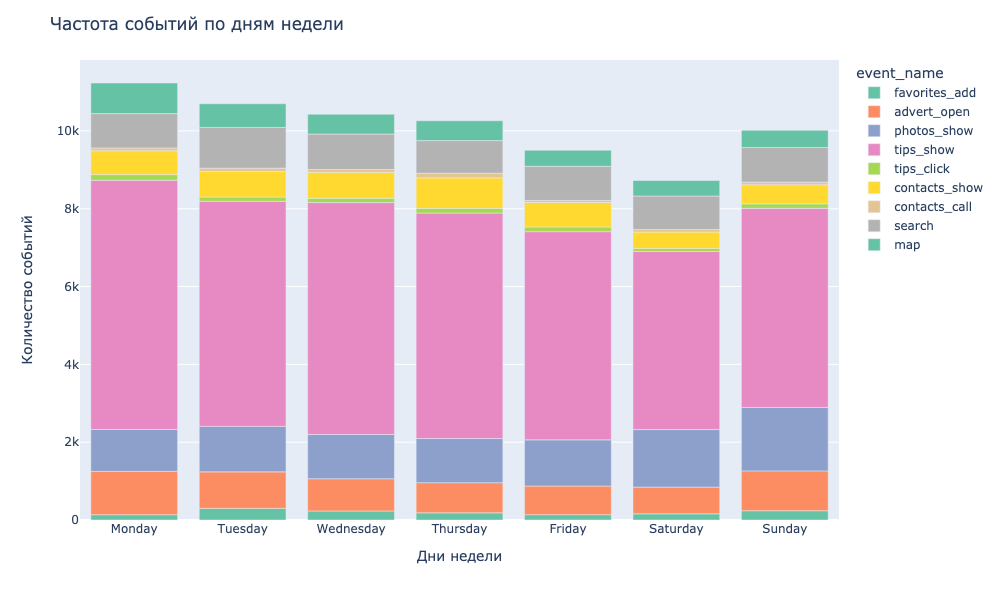

In [50]:
fig = px.bar(event_cnt.sort_values(by='week_day_num', ascending=True), # загружаем данные и заново их сортируем
             x='day_of_week', # указываем столбец с данными для оси X
             y='event_cnt', # указываем столбец с данными для оси Y                
             color='event_name',
            color_discrete_sequence=px.colors.qualitative.Set2)
fig.update_layout(title='Частота событий по дням недели',
                  xaxis_title='Дни недели',
                  yaxis_title='Количество событий')
                 
fig.show(renderer="png", width=1000, height=600)

**`Больше всех событий пользователи совершают в понедельник. Затем вплоть до субботы активность падает, а в воскресенье опять увеличивается.`**

### Расчет конверсии в целевое действие - просмотр контактов

In [51]:
# Создам датасет с информацией только по целевому событию contacts_show
df_contacts_how = df.query('event_name == "contacts_show"')

In [52]:
observation_date = df_contacts_how['date'].max()
analisis_horizon = 14

# Посчитаю конверсию по дате привлечения пользователей
conversion_raw, conversion, conversion_history = get_conversion(
    profiles, df_contacts_how, observation_date, analisis_horizon, dimensions=['first_date']
)
conversion.index = conversion.index.strftime('%Y-%m-%d')

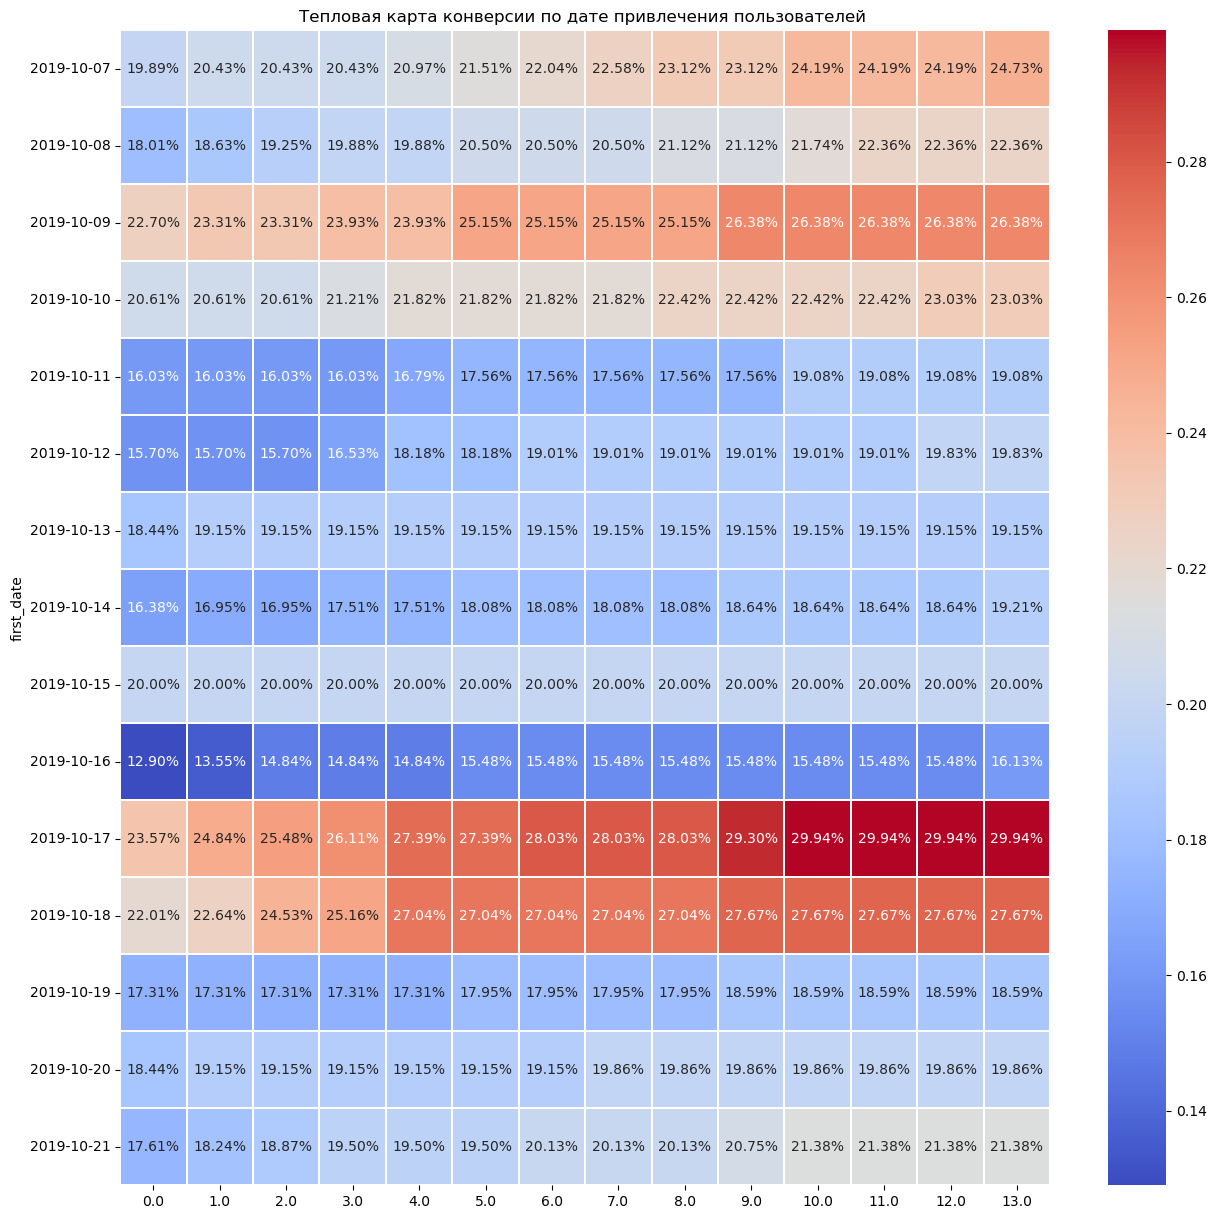

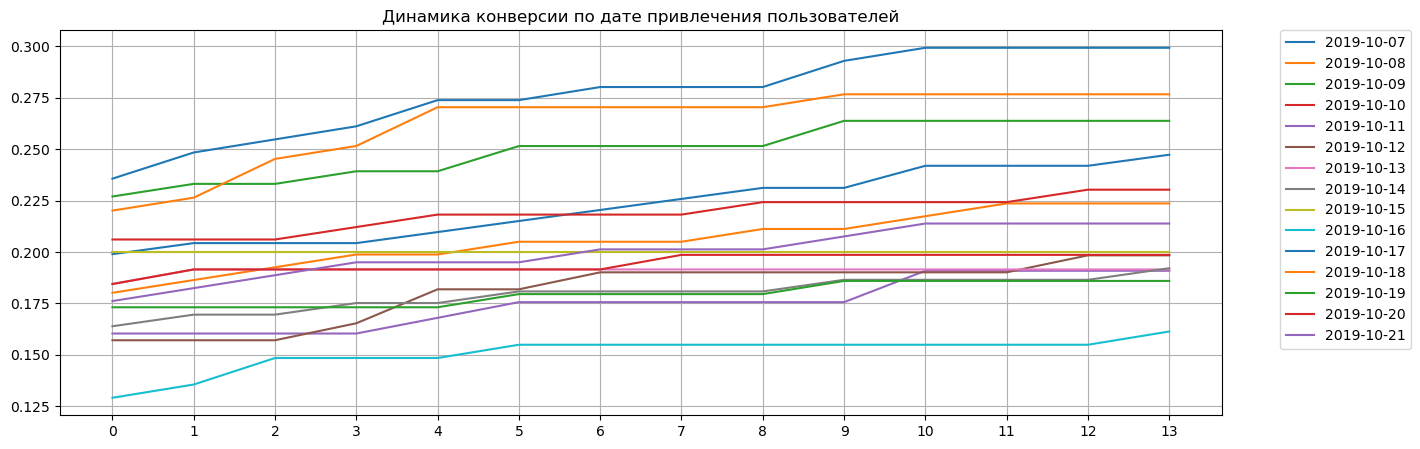

In [53]:
# исключаем размеры когорт
# конверсии первого дня различаются, их удалять не нужно
report = conversion.drop(columns = ['cohort_size'])

plt.figure(figsize=(15, 15))
sns.heatmap(
    report,
    annot=True,
    fmt='.2%',
    cmap='coolwarm',
    linewidths=0.01
)  # в первой ячейке таблицы графиков строим тепловую карту
plt.title('Тепловая карта конверсии по дате привлечения пользователей ')

report.T.plot(
    grid=True,
    xticks=list(report.columns.values),
    figsize=(15, 5)
)  # во второй — кривые конверсии
plt.title('Динамика конверсии по дате привлечения пользователей')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left', borderaxespad=0)

plt.show() 


**`Лучше всех до целевого события доходят пользователи, пришедшие 7,9, 17 и 18 октября. Самая низкая конверсия в целевое событие у пользователей, пришедших 19 октября, она практически не растет`**

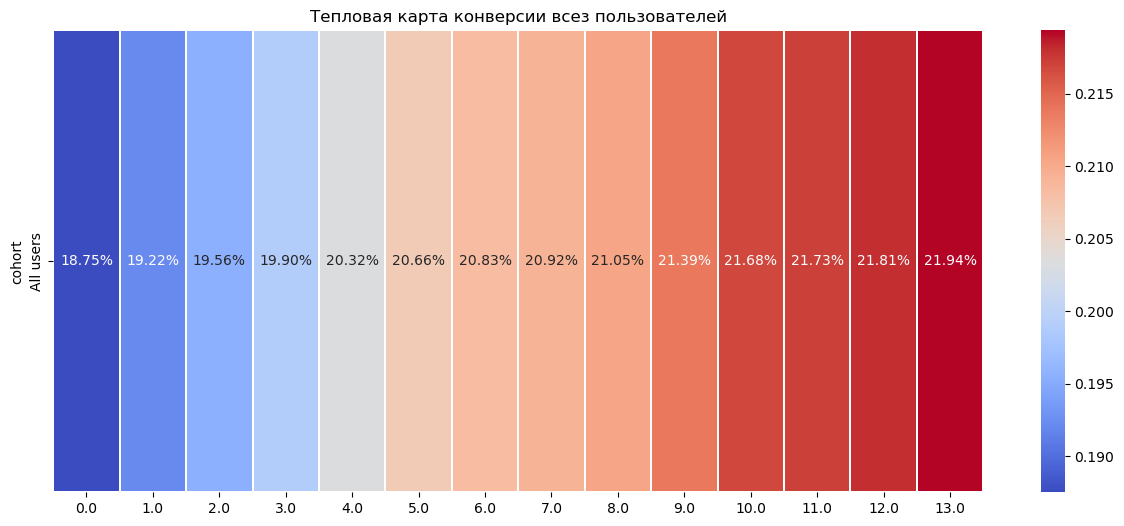

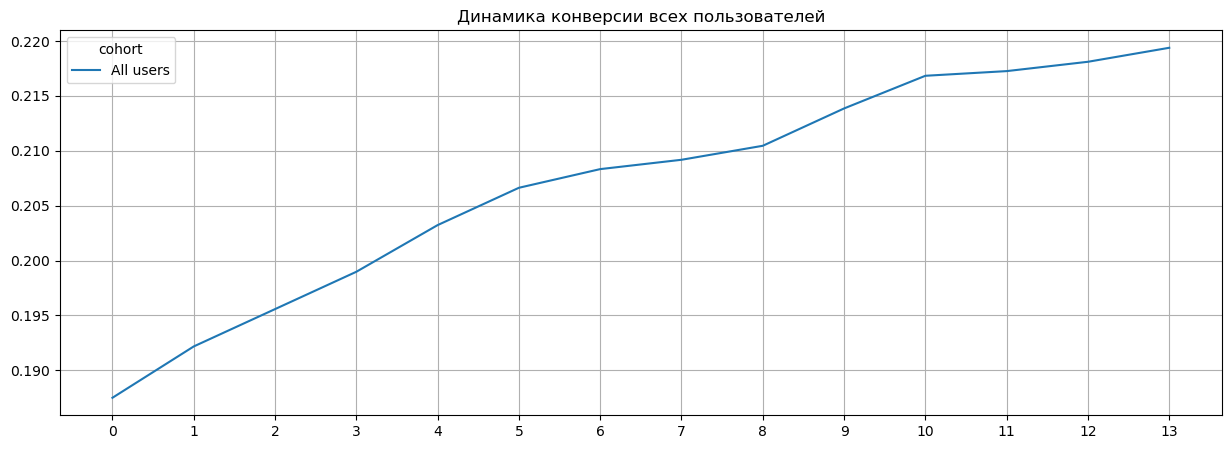

In [54]:
# Посчитаю конверсию без параметра dimensions
conversion_raw_total, conversion_total, conversion_history = get_conversion(
    profiles, df_contacts_how, observation_date, analisis_horizon,
)

# Построю графики
# исключаем размеры когорт
# конверсии первого дня различаются, их удалять не нужно
report = conversion_total.drop(columns = ['cohort_size'])

plt.figure(figsize=(15, 6))
sns.heatmap(
    report,
    annot=True,
    fmt='.2%',
    cmap='coolwarm',
    linewidths=0.01
)  # в первой ячейке таблицы графиков строим тепловую карту
plt.title('Тепловая карта конверсии всез пользователей')


report.T.plot(
    grid=True,
    xticks=list(report.columns.values),
    figsize=(15, 5)
)  # во второй — кривые конверсии
plt.title('Динамика конверсии всех пользователей')

plt.show()

**`Около 22% просматривают контакты продавца. Это не очень большой показатель. Есть куда расти. Нам неизвестно есть ли в приложении "Ненужные вещи" возможность связываться с продавцом через личные сообщения. Если есть, то возможно, часть пользователей именно так и делают и это влияет на целевое исследуемое действие.`**

### Вывод по проведенному исследовательскому анализу данных


- Провели анализ сессий с интервалом 0 секунд. Однозначно нельзя выделить какое-то конкретно событие, источника или дату, которые заканчиваются нулевой сессией. Предположу, что пользователи по личным причинам просто завершили сессию, не начав ее. Удалили этих сессии из общей таблицы.


- Рассчитали и построили график с данными удержания пользователей. По тепловой карте видно, что удержание пользователей падает не на всем периоде "жизни" пользователя в приложении. Есть дни, когда Retention Rate увеличивается. Прошло еще мало времени, чтобы утверждать как сильно падает метрика Retention Rate. И нельзя однозначно утверждать, что удержание падает, ведь пользователи могут не ежедневно искать объявления.


- Посмотрели на период использования приложения и определии, что в среднем за исследуемый период пользователи находились в приложении по 8 часов и открывали его в течение 10.5 дней.


- Проанализировали как часто совершаются события.Самое частое событие - tips_show. Оно происходило в приложении в среднем каждую минуту. Скорее всего это событие совершается автоматически, как только пользователь открывает приложение. Однако событие tips_click(пользователь кликнул по рекомендованному объявлению) совершается очень редко. Видна большая разница между событиями search(поиск) и tips_click(пользователь кликнул по рекомендованному объявлению). Пользователи предпочитают искать то, что им необходимо, через самостоятельно задаваемые критерии.


- Самое редкое событие contacts_call(пользователь позвонил по номеру телефона на карточке объявление). Оно в среднем происходило через каждые 73 минуты. Данные на графике так же это подтверждают.


- Больше всех событий пользователи совершают в понедельник. Затем вплоть до субботы активность падает, а в воскресенье опять увеличивается.


- Посчитали конверсию в целевое событие contacts_show. Лучше всех до целевого события доходят пользователи, пришедшие 7,9, 17 и 18 октября. Самая низкая коверсия в целевое событие у пользователей, пришедших 19 октября, она практически не растет


- Около 22% от всего количества пользователей просматривают контакты продавца. Показатель небольшой, необходимо найти причины и точки как его можно увеличить.

## Сегментация пользователей

### Разделение пользователей на группы

При создании профилей пользователей я заметила, что не у всех пользователей одно и то же первое событие в приложении.

In [55]:
# Еще раз выведу таблицу profiles
profiles

,user_id,first_ts,first_date,first_event,source
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07 13:39:46,2019-10-07,tips_show,other
1,00157779-810c-4498-9e05-a1e9e3cedf93,2019-10-19 21:34:34,2019-10-19,search,yandex
2,00463033-5717-4bf1-91b4-09183923b9df,2019-11-01 13:54:35,2019-11-01,photos_show,yandex
3,004690c3-5a84-4bb7-a8af-e0c8f8fca64e,2019-10-18 22:14:06,2019-10-18,search,google
4,00551e79-152e-4441-9cf7-565d7eb04090,2019-10-25 16:44:41,2019-10-25,contacts_show,yandex
...,...,...,...,...,...
4201,ffab8d8a-30bb-424a-a3ab-0b63ebbf7b07,2019-10-13 16:11:27,2019-10-13,map,yandex
4202,ffc01466-fdb1-4460-ae94-e800f52eb136,2019-10-07 20:32:50,2019-10-07,photos_show,yandex
4203,ffcf50d9-293c-4254-8243-4890b030b238,2019-10-23 11:51:35,2019-10-23,tips_show,google
4204,ffe68f10-e48e-470e-be9b-eeb93128ff1a,2019-10-21 16:39:34,2019-10-21,search,yandex


In [56]:
# Посмотрю на долю события tips_show от всего количества событий
print()
print('Доля пользователей, которые скачали и не зашли в приложение:', "{0:.2%}".format(len(profiles.query('first_event != "tips_show"'))/len(profiles)))


Доля пользователей, которые скачали и не зашли в приложение: 68.12%


Таких пользователей больше половины. Изучу эти категории этих пользователей более подробно.

Пока мое предположение - пользователи, которых изначально не заинтересовало приложение, демонстирируют вовлеченность и конверсию в целевое действие хуже, чем у тех, кто вошел самостоятельно.

Разделю всех пользователей на 2 группы:

1) Те, кто впервые вошел в приложение напрямую, т.е. их первое событие было tips_show

2) Те, кто впервые вошел в приложение через различные ссылки, т.е. их первое событие было любое, кроме tips_show

In [57]:
# Нахожу id пользователей, чье первое событие в приложении было tips_show
id_tips_show = profiles[profiles['first_event'] == 'tips_show']['user_id']
# Нахожу id пользователей, чье первое событие в приложении было любое, кроме tips_show
id_other_event = profiles[profiles['first_event'] != 'tips_show']['user_id']

In [58]:
# Создам таблицу сессий для пользователей, чье первое событие в приложении было tips_show
gr_tips_show = df.query('user_id in @id_tips_show')
print('Количество пользователей группы gr_tips_show:', gr_tips_show['user_id'].nunique())

# Создам таблицу сессий для пользователей, чье первое событие в приложении было любое, кроме tips_show
gr_other_event = df.query('user_id in @id_other_event')
print('Количество пользователей группы gr_other_event:', gr_other_event['user_id'].nunique())

Количество пользователей группы gr_tips_show: 1341
Количество пользователей группы gr_other_event: 2865


### Retention Rate для каждой группы пользователей

In [59]:
# Создам профили пользователей группы gr_tips_show
profiles_gr_tips_show = get_profiles(gr_tips_show)

# Создам профили пользователей группы gr_other_event
profiles_gr_other_event = get_profiles(gr_other_event)

In [60]:
# Рассчитаем Retention Rate группы gr_tips_show с горизонтом анаиза 14 дней
observation_date = gr_tips_show['date'].max()
analisis_horizon = 14

retention_raw_gr_tips_show, retention_gr_tips_show = get_retention(
    profiles_gr_tips_show,
    gr_tips_show,
    observation_date,
    analisis_horizon,
    dimensions=['first_date']
)
retention_gr_tips_show.index = retention_gr_tips_show.index.strftime('%Y-%m-%d')

# Рассчитаем Retention Rate группы gr_other_event с горизонтом анаиза 14 дней
observation_date = gr_other_event['date'].max()
analisis_horizon = 14

retention_raw_gr_other_event, retention_gr_other_event = get_retention(
    profiles_gr_other_event,
    gr_other_event,
    observation_date,
    analisis_horizon,
    dimensions=['first_date']
)

retention_gr_other_event.index = retention_gr_other_event.index.strftime('%Y-%m-%d')

Text(1340.0404040404037, 0.5, 'Когорта')

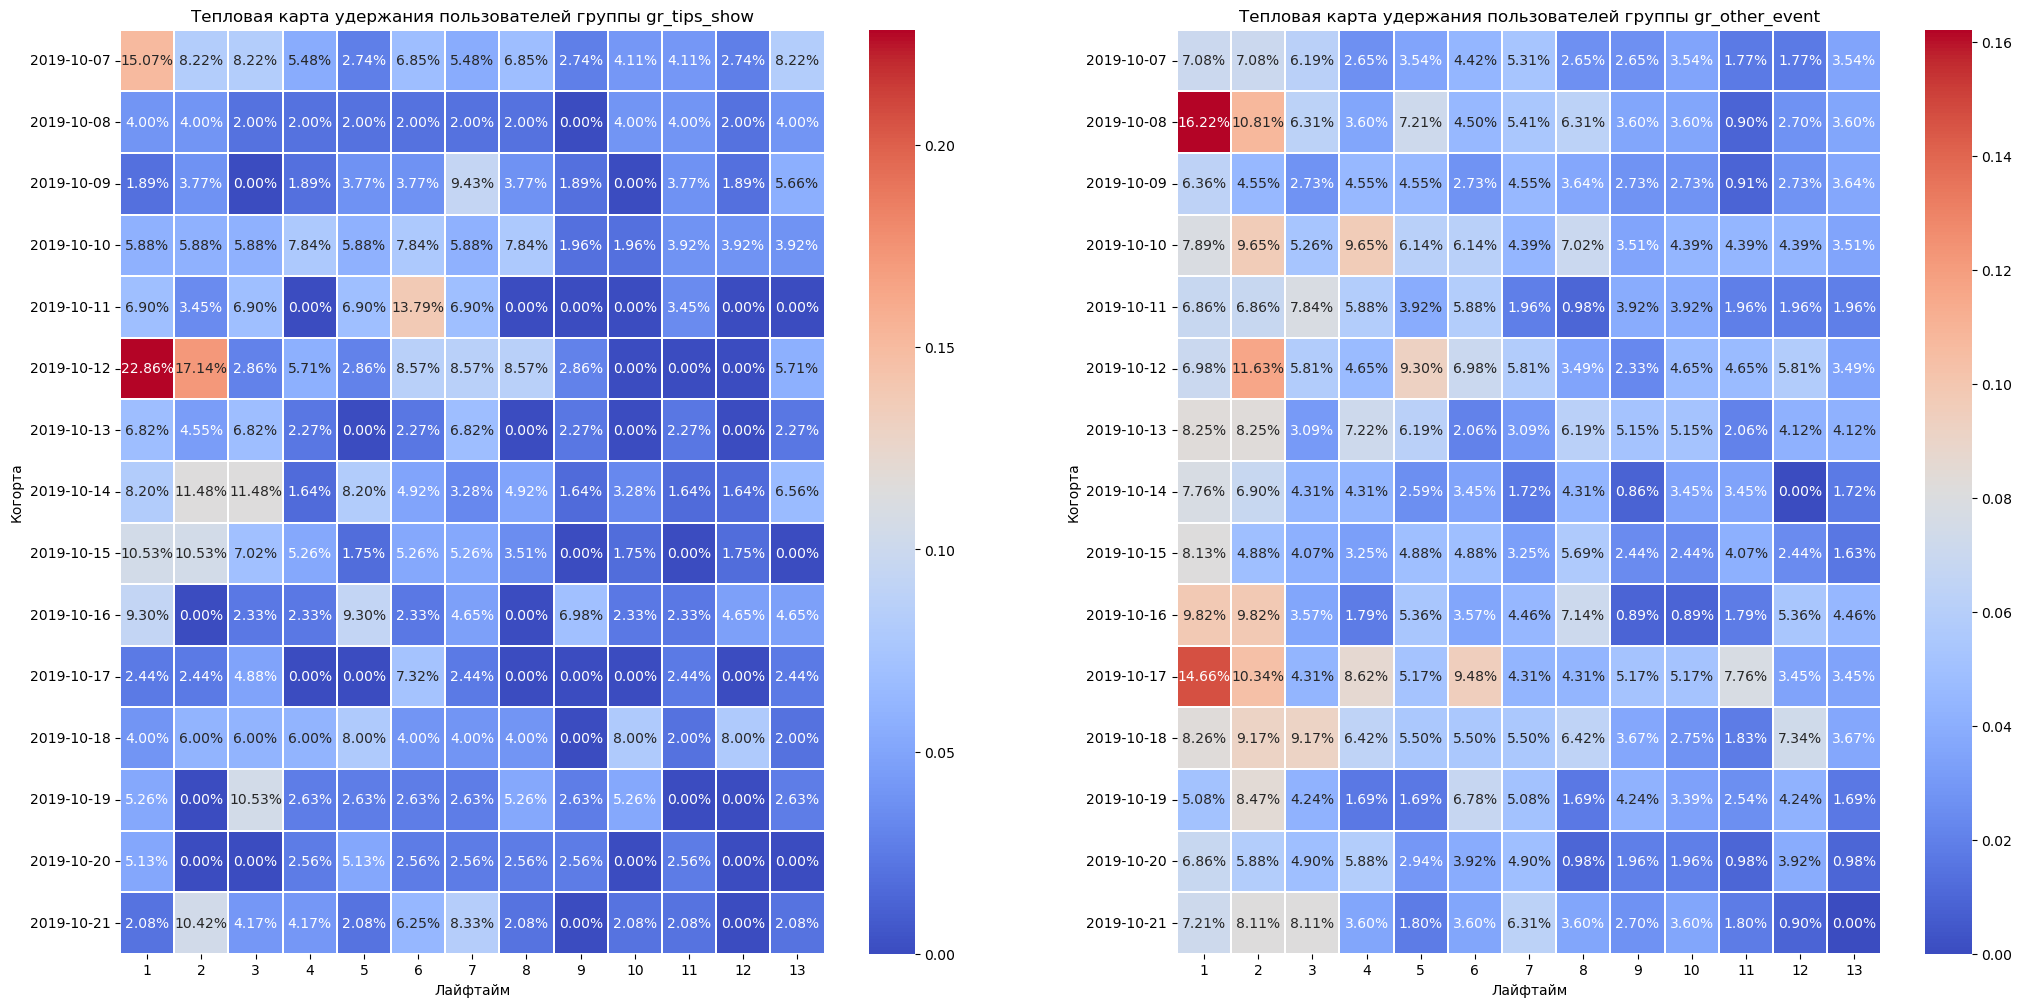

In [61]:
# Построим хитмэп
plt.figure(figsize=(25, 12))  # задаём размер графика
sns.heatmap(
    retention_gr_tips_show.drop(columns=['cohort_size', 0]),  # удаляем размеры когорт и нулевой лайфтайм
    annot=True,# включаем подписи
    fmt='.2%',
    cmap='coolwarm',
    linewidths=0.01,
    ax=plt.subplot(1, 2, 1)
    
    
)
plt.title('Тепловая карта удержания пользователей группы gr_tips_show')
plt.xlabel('Лайфтайм')
plt.ylabel('Когорта')
          
sns.heatmap(
    retention_gr_other_event.drop(columns=['cohort_size', 0]),  # удаляем размеры когорт и нулевой лайфтайм
    annot=True,# включаем подписи
    fmt='.2%',
    cmap='coolwarm',
    linewidths=0.01,
    ax=plt.subplot(1, 2, 2)
   
    
    
)
plt.title('Тепловая карта удержания пользователей группы gr_other_event')
plt.xlabel('Лайфтайм')
plt.ylabel('Когорта')


**`По хитмэпу понятно, что удержание пользователей лучше у тех, кто приходил в приложение не самостоятельно, а через внешние ссылки`**

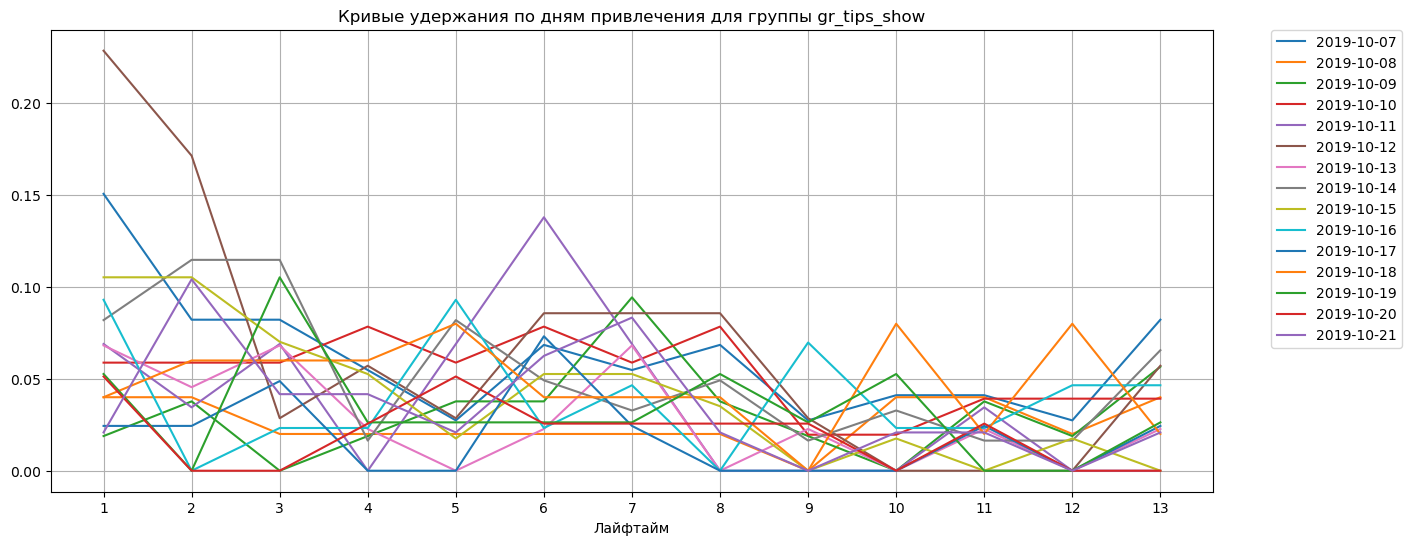

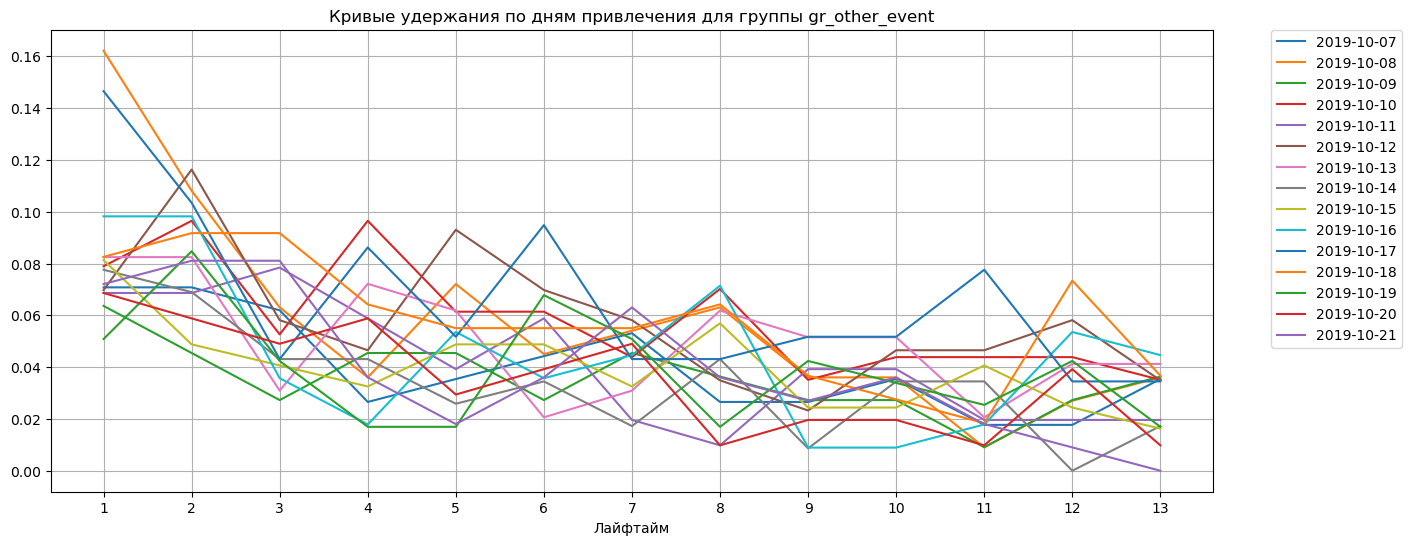

In [62]:
# Построю кривые удержания для каждой группы
report = retention_gr_tips_show.drop(columns = ['cohort_size', 0])

report.T.plot(
    grid=True,  # добавляем сетку
    xticks=list(report.columns.values),  # отметки на оси X — названия колонок
    figsize=(15, 6)
)

plt.xlabel('Лайфтайм')  # название оси X
plt.title('Кривые удержания по дням привлечения для группы gr_tips_show')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left', borderaxespad=0)

report = retention_gr_other_event.drop(columns = ['cohort_size', 0])

report.T.plot(
    grid=True,  # добавляем сетку
    xticks=list(report.columns.values),  # отметки на оси X — названия колонок
    figsize=(15, 6)
)

plt.xlabel('Лайфтайм')  # название оси X
plt.title('Кривые удержания по дням привлечения для группы gr_other_event')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left', borderaxespad=0)
plt.show()

**`Эти графики так же подтверждают, что пользователи группы gr_other_event пользуются приложением чаще, чем пользователи группы gr_tips_show`** 

### Конверсия для каждой группы пользователей

In [63]:
gr_tips_show_contacts_show = gr_tips_show.query('event_name == "contacts_show"')
gr_other_event_contacts_show = gr_other_event.query('event_name == "contacts_show"')

In [64]:
observation_date = gr_tips_show_contacts_show['date'].max()
analisis_horizon = 7

# Посчитаю конверсию по дате привлечения пользователей
conversion_raw_gr_tips_show_contacts_show, conversion_gr_tips_show_contacts_show, conversion_history_gr_tips_show_contacts_show = get_conversion(
    profiles_gr_tips_show, gr_tips_show_contacts_show, observation_date, analisis_horizon, dimensions=['first_date']
)

conversion_gr_tips_show_contacts_show.index = conversion_gr_tips_show_contacts_show.index.strftime('%Y-%m-%d')
# Посчитаю конверсию по дате привлечения пользователей
conversion_raw_gr_other_event_contacts_show, conversion_gr_other_event_contacts_show, conversion_history_gr_other_event_contacts_show = get_conversion(
    profiles_gr_other_event, gr_other_event_contacts_show, observation_date, analisis_horizon, dimensions=['first_date']
)
conversion_gr_other_event_contacts_show.index = conversion_gr_other_event_contacts_show.index.strftime('%Y-%m-%d')


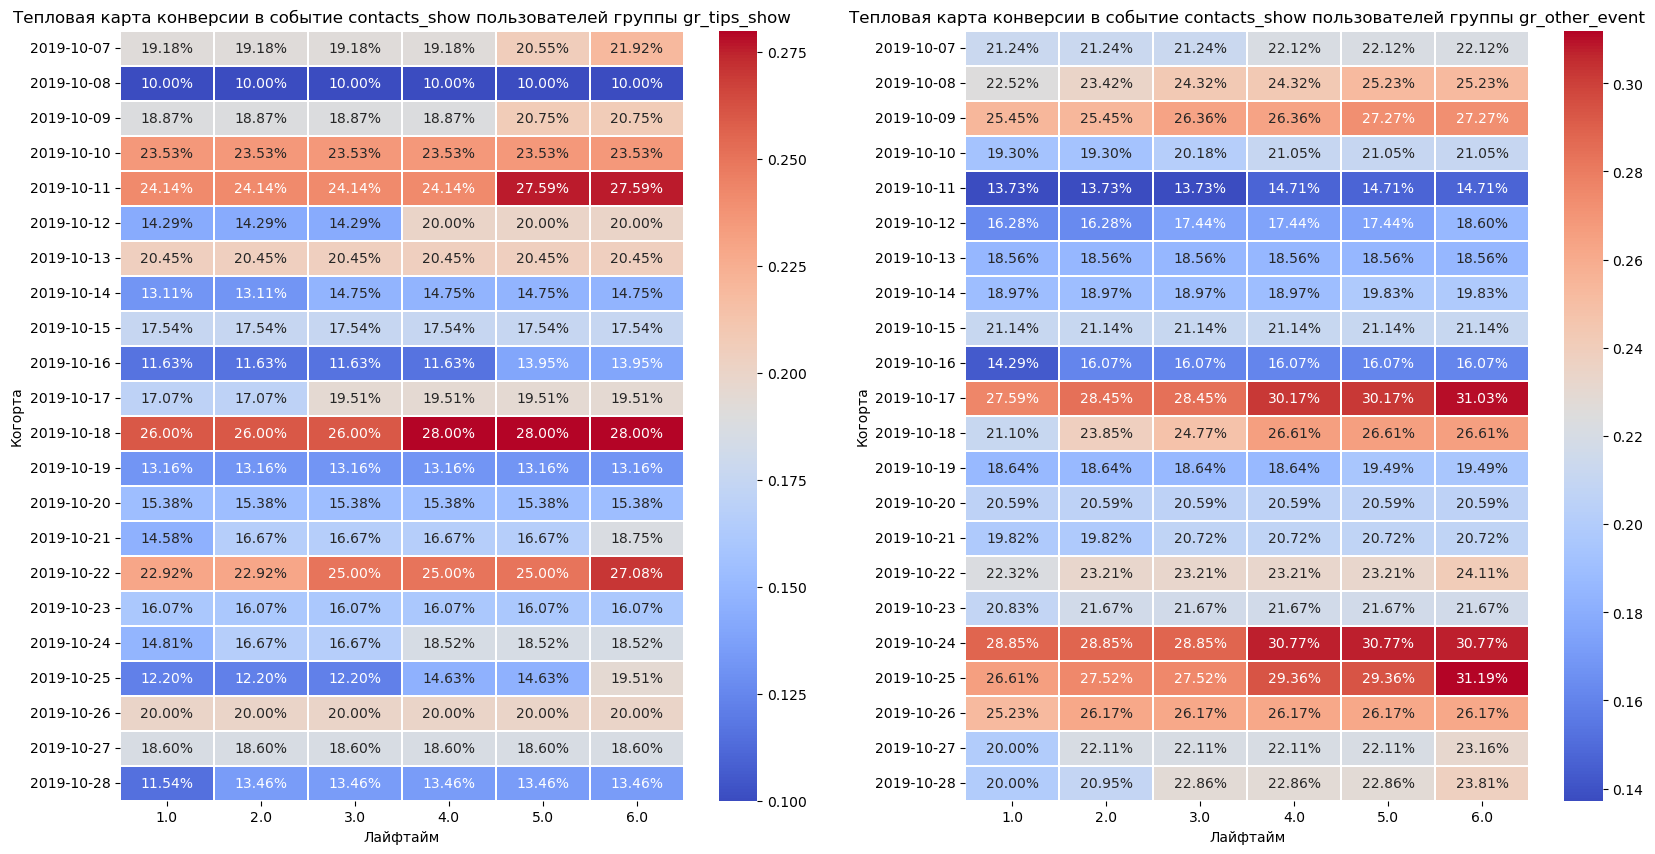

In [65]:
# Построим хитмэп
plt.figure(figsize=(20, 10))# задаём размер графика


sns.heatmap(
    conversion_gr_tips_show_contacts_show.drop(columns=['cohort_size', 0]),  # удаляем размеры когорт и нулевой лайфтайм
    annot=True,# включаем подписи
    fmt='.2%',
    cmap='coolwarm',
    linewidths=0.01,
    ax=plt.subplot(1, 2, 1)
    
    
)
plt.title('Тепловая карта конверсии в событие contacts_show пользователей группы gr_tips_show')
plt.xlabel('Лайфтайм')
plt.ylabel('Когорта')
          
sns.heatmap(
    conversion_gr_other_event_contacts_show.drop(columns=['cohort_size', 0]),  # удаляем размеры когорт и нулевой лайфтайм
    annot=True,# включаем подписи
    fmt='.2%',
    cmap='coolwarm',
    linewidths=0.01,
    ax=plt.subplot(1, 2, 2)
)

plt.title('Тепловая карта конверсии в событие contacts_show пользователей группы gr_other_event')
plt.xlabel('Лайфтайм')
plt.ylabel('Когорта')
          
plt.show()

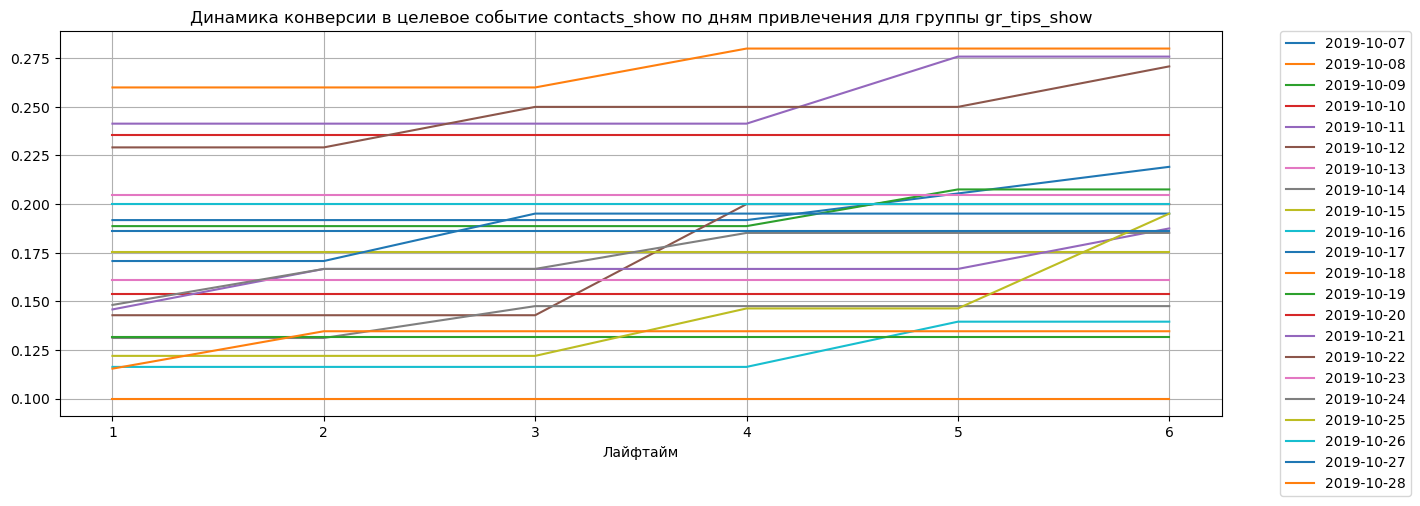

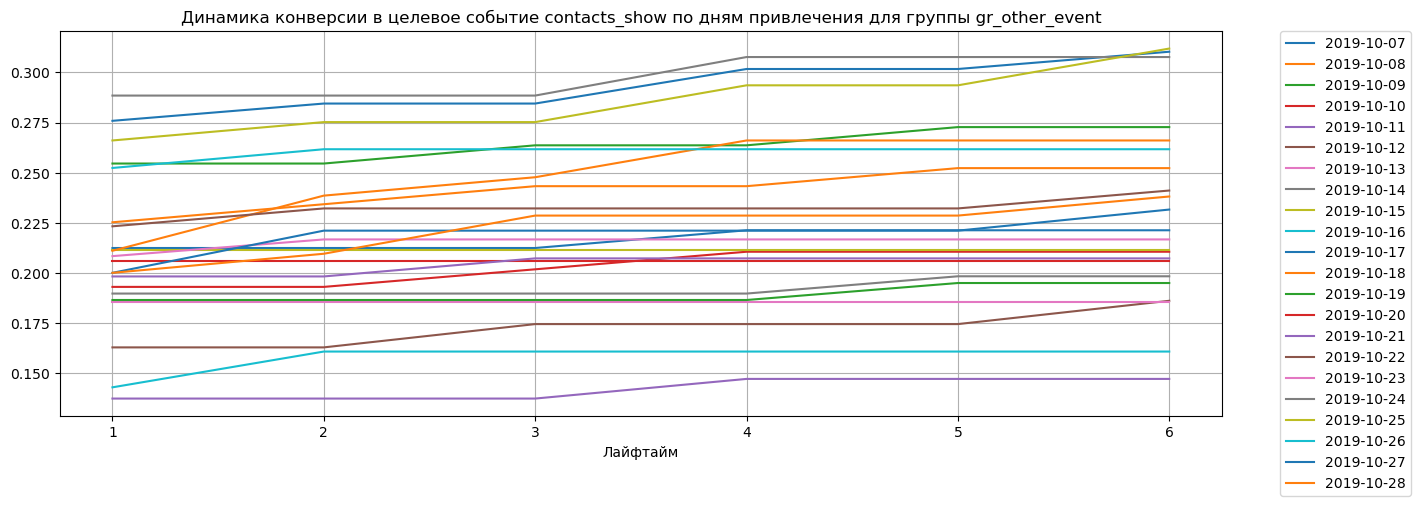

In [66]:
# Построю кривые удержания для каждой группы
report = conversion_gr_tips_show_contacts_show.drop(columns = ['cohort_size', 0])

report.T.plot(
    grid=True,  # добавляем сетку
    xticks=list(report.columns.values),  # отметки на оси X — названия колонок
    figsize=(15, 5)
)

plt.xlabel('Лайфтайм') 
plt.title('Динамика конверсии в целевое событие contacts_show по дням привлечения для группы gr_tips_show')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left', borderaxespad=0)
plt.show()

report = conversion_gr_other_event_contacts_show.drop(columns = ['cohort_size', 0])

report.T.plot(
    grid=True,  # добавляем сетку
    xticks=list(report.columns.values),  # отметки на оси X — названия колонок
    figsize=(15, 5)
)

plt.xlabel('Лайфтайм')
plt.title('Динамика конверсии в целевое событие contacts_show по дням привлечения для группы gr_other_event')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left', borderaxespad=0)
plt.show()

**`Пользователи из группы gr_tips_show пришедшие 8 октября показывают нулевую конверсию в целевое действие. Но в целом нельзя выделить какую-то из этих групп по конверсии в целевое действие.`**

In [67]:
# Посчитаю общую конверсию группы gr_tips_show без параметра dimensions
conversion_raw_gr_tips_show_contacts_show_total, conversion_gr_tips_show_contacts_show_total, conversion_history_gr_tips_show_contacts_show_total = get_conversion(
    profiles_gr_tips_show, gr_tips_show_contacts_show, observation_date, analisis_horizon
)

# Посчитаю общую конверсию группы gr_other_event без параметра dimensions
conversion_raw_gr_other_event_contacts_show_total, conversion_gr_other_event_contacts_show_total, conversion_history_gr_other_event_contacts_show_total = get_conversion(
    profiles_gr_other_event, gr_other_event_contacts_show, observation_date, analisis_horizon
)

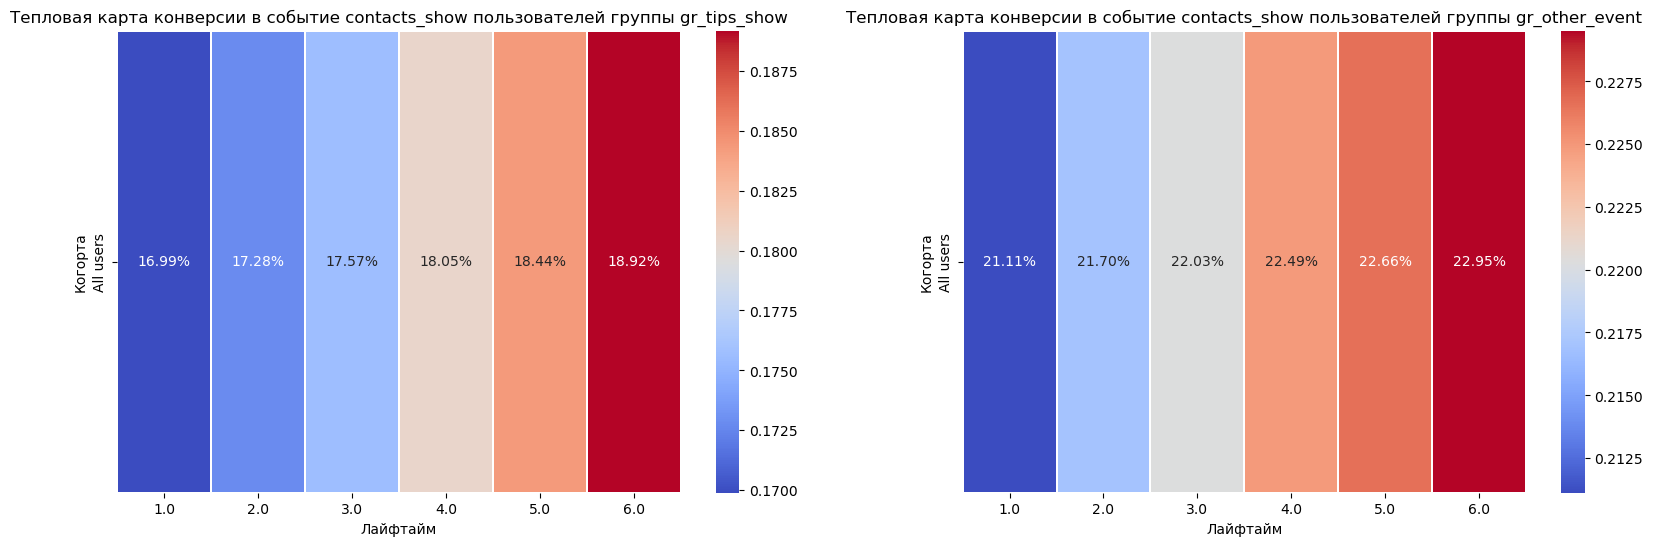

In [68]:
# Построим хитмэп
plt.figure(figsize=(20, 6))# задаём размер графика


sns.heatmap(
    conversion_gr_tips_show_contacts_show_total.drop(columns=['cohort_size', 0]),  # удаляем размеры когорт и нулевой лайфтайм
    annot=True,# включаем подписи
    fmt='.2%',
    cmap='coolwarm',
    linewidths=0.01,
    ax=plt.subplot(1, 2, 1)
    
    
)
plt.title('Тепловая карта конверсии в событие contacts_show пользователей группы gr_tips_show')
plt.xlabel('Лайфтайм')
plt.ylabel('Когорта')
          
sns.heatmap(
    conversion_gr_other_event_contacts_show_total.drop(columns=['cohort_size', 0]),  # удаляем размеры когорт и нулевой лайфтайм
    annot=True,# включаем подписи
    fmt='.2%',
    cmap='coolwarm',
    linewidths=0.01,
    ax=plt.subplot(1, 2, 2)
)

plt.title('Тепловая карта конверсии в событие contacts_show пользователей группы gr_other_event')
plt.xlabel('Лайфтайм')
plt.ylabel('Когорта')
          
plt.show()

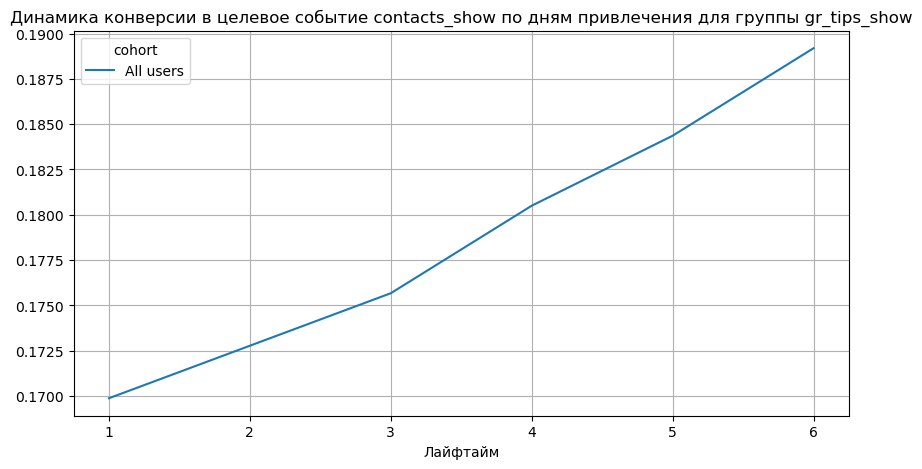

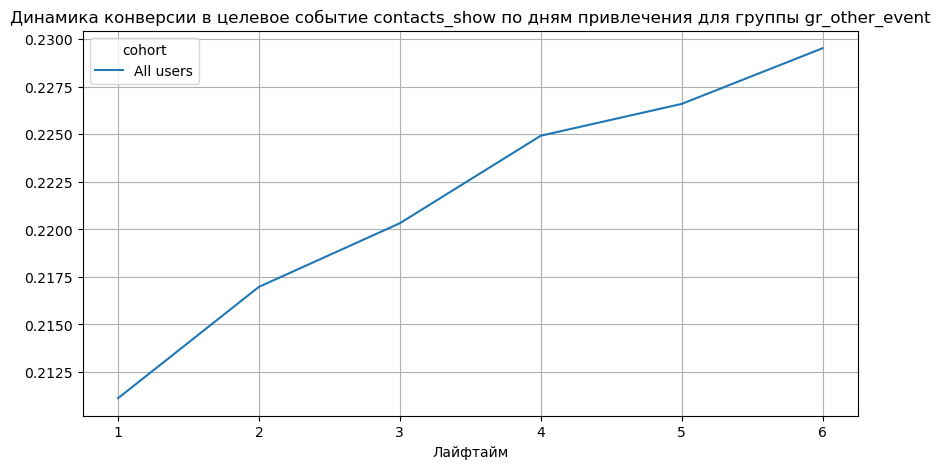

In [69]:
# Построю кривые удержания для каждой группы
report = conversion_gr_tips_show_contacts_show_total.drop(columns = ['cohort_size', 0])

report.T.plot(
    grid=True,  # добавляем сетку
    xticks=list(report.columns.values),  # отметки на оси X — названия колонок
    figsize=(10, 5)
)

plt.xlabel('Лайфтайм') 
plt.title('Динамика конверсии в целевое событие contacts_show по дням привлечения для группы gr_tips_show')
plt.show()

report = conversion_gr_other_event_contacts_show_total.drop(columns = ['cohort_size', 0])

report.T.plot(
    grid=True,  # добавляем сетку
    xticks=list(report.columns.values),  # отметки на оси X — названия колонок
    figsize=(10, 5)
)

plt.xlabel('Лайфтайм')
plt.title('Динамика конверсии в целевое событие contacts_show по дням привлечения для группы gr_other_event')
plt.show()

**`Общая конверсия группы gr_other_event выше, чем у группы gr_tips_show, и составляет 22,95%`**

### Вывод по проведенной сегментации


- Разделили всех пользователей на 2 группы:

 - Те, кто впервые вошел в приложение напрямую, т.е. их первое событие было tips_show - gr_tips_show

 - Те, кто впервые вошел в приложение через различные ссылки, т.е. их первое событие было любое, кроме tips_show - gr_other_event
 

- Посчитали Retention Rate для каждой группы. Выяснили, что пользователи группы gr_other_event удерживаются лучше, чем пользователи группы gr_tips_show


- Посчитали Coversion Rate для каждой группы. Выяснили, что пользователи группы gr_other_event лучше конвертируются в целевое действие.

## Проверка статистических гипотез

### Некоторые пользователи установили приложение по ссылке из yandex, другие — из google. Проверьте гипотезу: две эти группы демонстрируют разную конверсию в просмотры контактов.

Сформулирую нулевую и альтернативную гипотезы:

- **H0** - Конверсии целевое действие contacts_show у пользователей Yandex и Google равны
- **H1** - Конверсии целевое действие contacts_show у пользователей Yandex и Google не равны

In [70]:
# Найду количество уникальных пользователей в каждой группе
user_by_group_source = df.groupby('source')['user_id'].nunique()
user_by_group_source

source
google    1114
other     1196
yandex    1896
Name: user_id, dtype: int64

In [71]:
# Создам таблицу, в которой будут отображены количество и доля пользователей, совершивших целевое событие contacts_show
contacts_show_by_user_group = (
    df.query('event_name == "contacts_show" and source != "other"')
    .pivot_table(
        index='event_name',
        columns = 'source',
        values = 'user_id',
        aggfunc='nunique')
    .reset_index()
)
contacts_show_by_user_group['%_cr_yandex'] = (contacts_show_by_user_group['yandex']/user_by_group_source['yandex']*100).round(2)
contacts_show_by_user_group['%_cr_google'] = (contacts_show_by_user_group['google']/user_by_group_source['google']*100).round(2)
contacts_show_by_user_group[['event_name','yandex','%_cr_yandex','google','%_cr_google']]


source,event_name,yandex,%_cr_yandex,google,%_cr_google
0,contacts_show,466,24.58,268,24.06


In [72]:
def z_test(group_1, group_2, alpha):
    for i in contacts_show_by_user_group.index:
        # пропорция успехов в первой группе:
        p1 = contacts_show_by_user_group[group_1][i]/user_by_group_source[group_1]

        # пропорция успехов во второй группе:
        p2 = contacts_show_by_user_group[group_2][i]/user_by_group_source[group_2]
        
        print(contacts_show_by_user_group[group_1][i], contacts_show_by_user_group[group_2][i], user_by_group_source[group_1], user_by_group_source[group_2])

        # пропорция успехов в комбинированном датасете:
        p_combined = (contacts_show_by_user_group[group_1][i] + contacts_show_by_user_group[group_2][i]) / (user_by_group_source[group_1] + user_by_group_source[group_2])

        # разница пропорций в датасетах
        difference = p1 - p2 
        # считаем статистику в ст.отклонениях стандартного нормального распределения
        z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/user_by_group_source[group_1] + 1/user_by_group_source[group_2]))

        # задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
        distr = st.norm(0, 1)  
        p_value = (1 - distr.cdf(abs(z_value))) * 2
        
        print('p-значение события {} между группами {} и {} равно {}'.format(contacts_show_by_user_group['event_name'][i], group_1, group_2, p_value))

        if p_value < alpha:
            print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
        else:
            print(
                'Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными'
            )

In [73]:
z_test('yandex', 'google', 0.05)

466 268 1896 1114
p-значение события contacts_show между группами yandex и google равно 0.7480888018558933
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


### Среднее время, проведенное в приложении в выходные дни, отличается от среднего времени, проведенном в приложении в будние дни.

Сформулирую нулевую и альтернативную гипотезы:

- **H0** - Среднее время, проведенное в приложении в выходные дни, и среднее время в будние дни равны между собой
- **H1** - Среднее время, проведенное в приложении в выходные дни, и среднее время в будние дни не равны между собой

In [74]:
weekends = ['Saturday', 'Sunday']
weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']

In [75]:
weekends_df = df.query('day_of_week in @weekends')
weekday_df = df.query('day_of_week in @weekday')

In [76]:
print('Среднее количество часов, проведенное в приложении в будние дни:', weekday_df['total_duration'].mean().round(2))
print('Среднее количество часов, проведенное в приложении в выходные дни:', weekends_df['total_duration'].mean().round(2))

# results = вызов метода для проверки гипотезы
results = st.ttest_ind(
    weekends_df['total_duration'],
    weekday_df['total_duration']
)
# alpha = задайте значение уровня значимости
alpha = .05
# вывод значения p-value на экран 
print('p-значение:',results.pvalue)
# условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу, между долями есть значимая разница')
else:
    print('Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными')

Среднее количество часов, проведенное в приложении в будние дни: 2.17
Среднее количество часов, проведенное в приложении в выходные дни: 1.72
p-значение: 1.7832341143648098e-44
Отвергаем нулевую гипотезу, между долями есть значимая разница


## Общий вывод и рекомендации

**Выводы**

- Провели анализ сессий с интервалом 0 секунд. Однозначно нельзя выделить какое-то конкретно событие, источника или дату, которые заканчиваются нулевой сессией. Предположу, что пользователи по личным причинам просто завершили сессию, не начав ее.


- Рассчитали и построили график с данными удержания пользователей. По тепловой карте видно, что удержание пользователей падает не на всем периоде "жизни" пользователя в приложении. Есть дни, когда Retention Rate увеличивается. Прошло еще мало времени, чтобы утверждать как сильно падает метрика Retention Rate. И нельзя однозначно утверждать, что удержание падает, ведь пользователи могут не ежедневно искать объявления.


- Посмотрели на период использования приложения и определии, что в среднем за исследуемый период пользователи находились в приложении по 8 часов и открывали в среднем его в течение 10.5 дней.


- Проанализировали как часто совершаются события.Самое частое событие - tips_show. Оно происходило в приложении в среднем каждую минуту. Скорее всего это событие совершается автоматически, как только пользователь открывает приложение. Однако событие tips_click(пользователь кликнул по рекомендованному объявлению) совершается очень редко. Видна большая разница между событиями search(поиск) и tips_click(пользователь кликнул по рекомендованному объявлению). Пользователи предпочитают искать то, что им необходимо, через самостоятельно задаваемые критерии.


- Самое редкое событие contacts_call(пользователь позвонил по номеру телефона на карточке объявление). Оно в среднем происходило через каждые 73 минуты. Данные на графике так же это подтверждают.


- Больше всех событий пользователи совершают в понедельник. Затем вплоть до субботы активность падает, а в воскресенье опять увеличивается


- Посчитали конверсию в целевое событие contacts_show. Лучше всех до целевого события доходят пользователи, пришедшие 7,9, 17 и 18 октября. Самая низкая конверсия в целевое событие у пользователей, пришедших 19 октября, она практически не растет


- Около 22% от всего количества пользователей просматривают контакты продавца. Показатель небольшой, необходимо найти причины и точки как его можно увеличить.

- Разделили всех пользователей на 2 группы:

 - Те, кто впервые вошел в приложение напрямую, т.е. их первое событие было tips_show - gr_tips_show

 - Те, кто впервые вошел в приложение через различные ссылки, т.е. их первое событие было любое, кроме tips_show - gr_other_event
 

- Посчитали Retention Rate для каждой группы. Выяснили, что пользователи группы gr_other_event удерживаются лучше, чем пользователи группы gr_tips_show


- Посчитали Coversion Rate для каждой группы. Выяснили, что пользователи группы gr_other_event лучше конвертируются в целевое действие.



**Рекомендации**

- Т.к. период исследуемых данных небольшой, для более корректного определения можно взять бОльший период исследования.


- Основные мероприятия по увеличению использования приложения направить на тех, кто заходит в него по внешним ссылкам.


- Можно подумать над увеличением рекламы и освещение активностей, рассылкой push-уведомлений, оповещение через сервисы эл.по


- Для увеличения просмотра рекомендованных объявлений необходимо улучшать подборку таких объявлений.


- Необходимо увеличивать количество "органических" пользователей. Грамотная контент-стратегия поможет продвинуть приложение среди таких пользователей.